# Artificial Neural Networks and Deep Learning

---

## Homework 2: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 2` in your Google Drive.
2. Upload the `mars_for_students.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 2 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.csv` file to Kaggle.


## ⚙️ Import Libraries

In [1]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
%matplotlib inline

# Imposta il seed
seed = 40  # Variabile per il seed
np.random.seed(seed)
tf.random.set_seed(seed)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.16.1
Keras version: 3.3.3
GPU devices: 1


## ⏳ Load the Data

In [2]:
data = np.load("/kaggle/input/mars-for-students-npz/mars_for_students.npz")

training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


## Data inspection

### Print images with class 4 in them

In [3]:
from matplotlib.colors import ListedColormap

# Trova gli indici delle immagini che contengono la classe 4
indices_with_class_4 = [i for i, label in enumerate(y_train) if 4 in label]

# Conta quante immagini contengono la classe 4
count_class_4 = len(indices_with_class_4)
print(f"Numero di immagini che contengono la classe 4: {count_class_4}")

# Calcola la percentuale media della classe 4
percentages = []

for idx in indices_with_class_4:
    label = y_train[idx]
    num_class_4_pixels = np.sum(label == 4)  # Conta i pixel appartenenti alla classe 4
    total_pixels = label.size  # Calcola il totale dei pixel dell'immagine
    percentage_class_4 = (num_class_4_pixels / total_pixels) * 100
    percentages.append(percentage_class_4)

# Calcola la percentuale media
average_percentage_class_4 = np.mean(percentages)
print(f"Percentuale media di pixel appartenenti alla classe 4 nelle immagini in cui è presente: {average_percentage_class_4:.2f}%")

Numero di immagini che contengono la classe 4: 63
Percentuale media di pixel appartenenti alla classe 4 nelle immagini in cui è presente: 5.22%


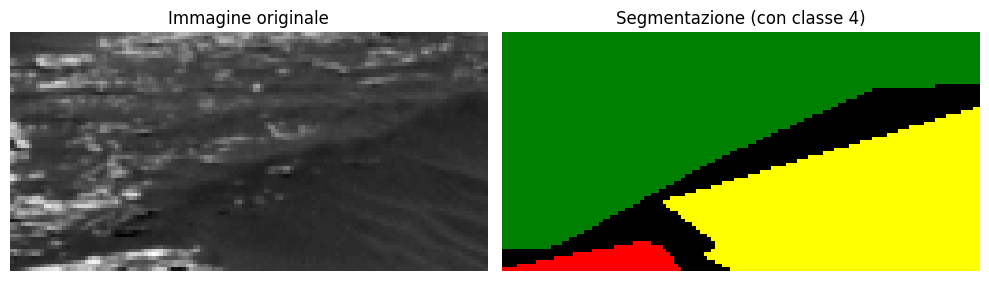

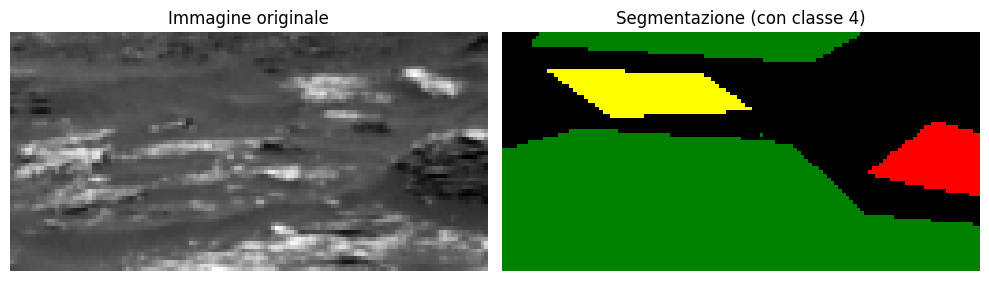

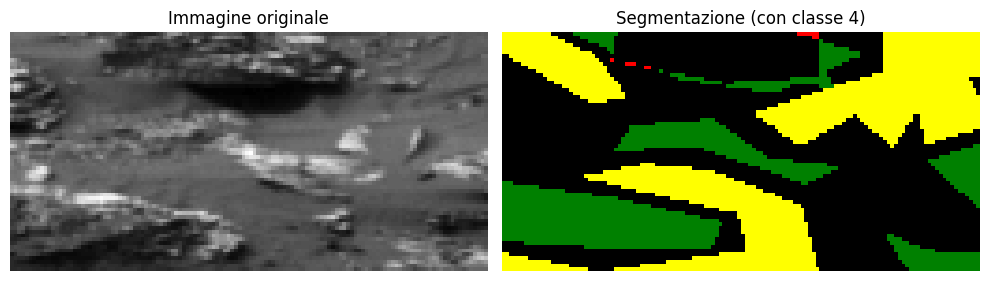

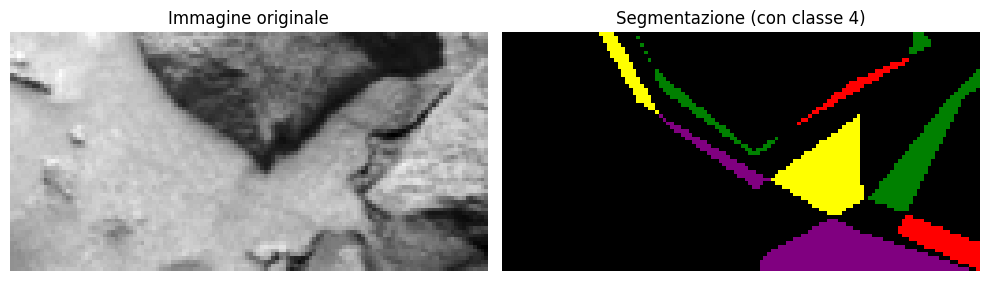

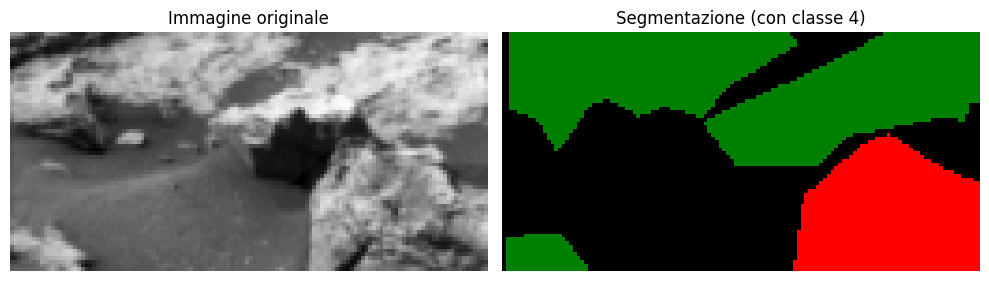

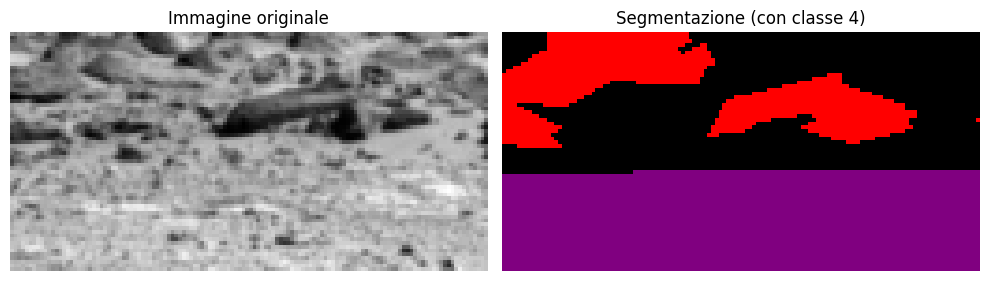

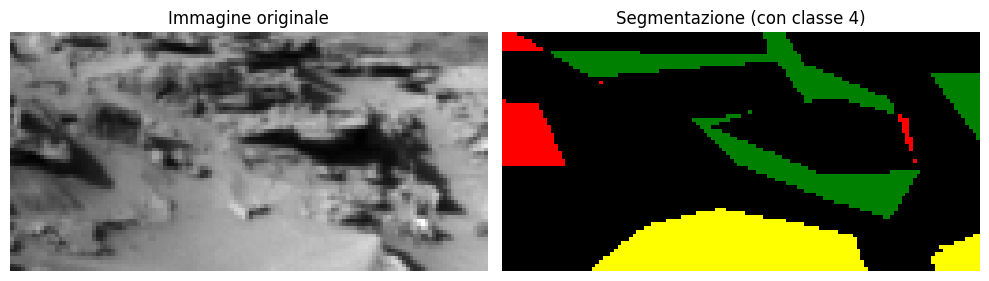

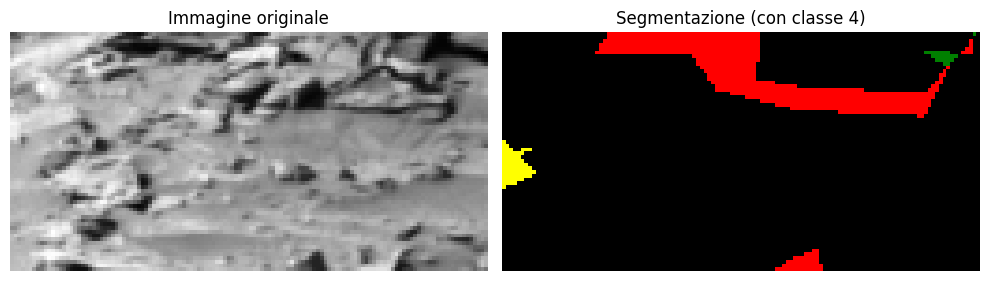

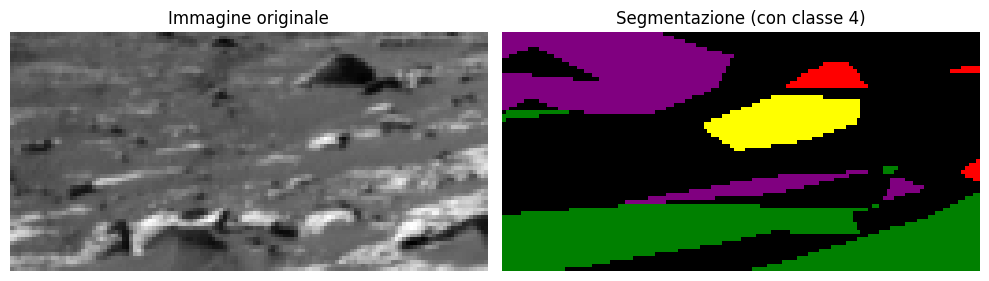

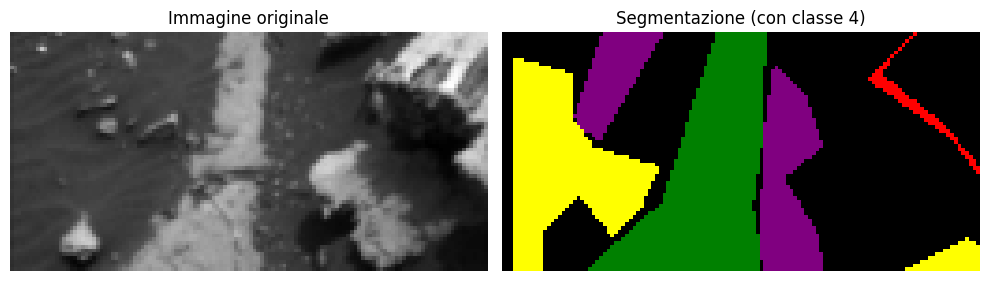

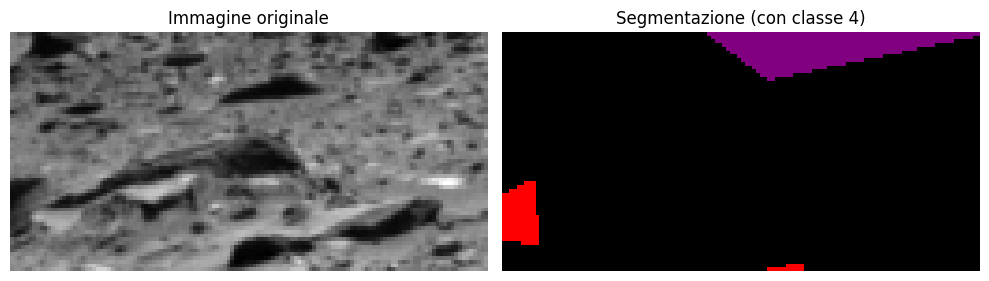

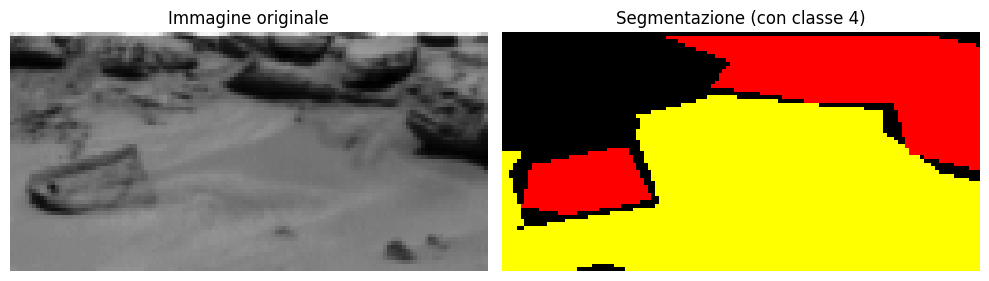

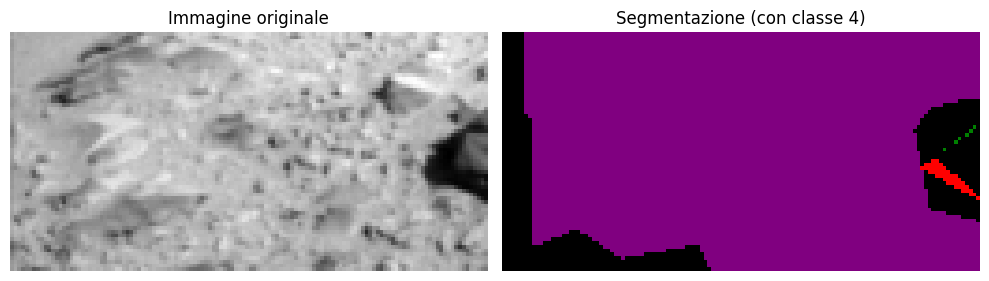

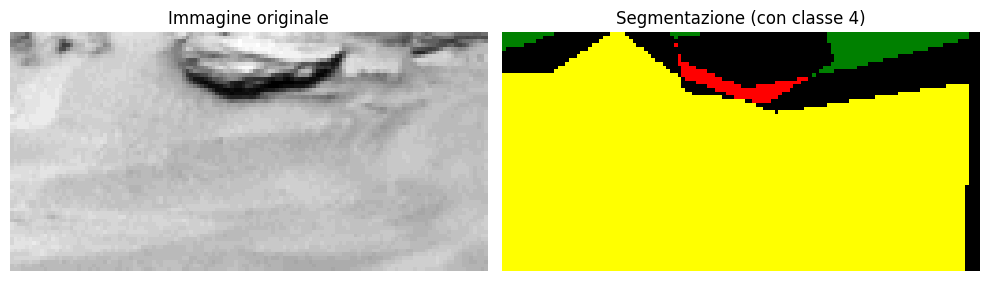

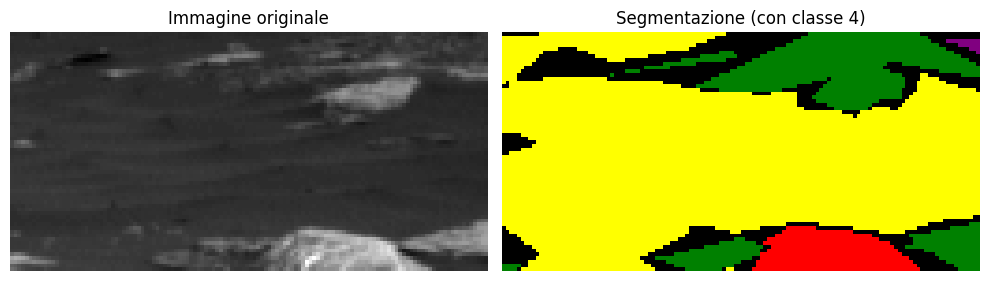

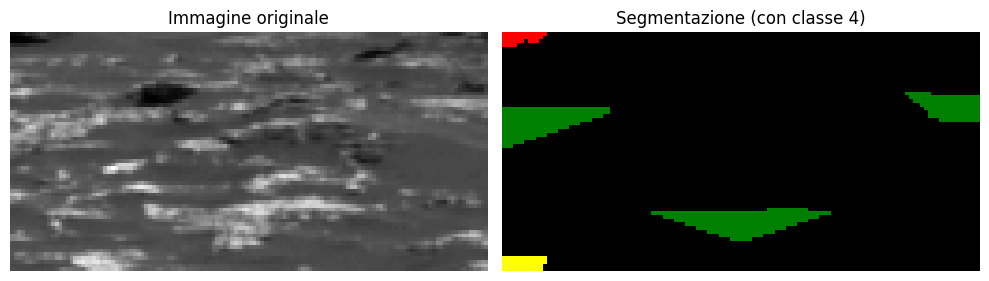

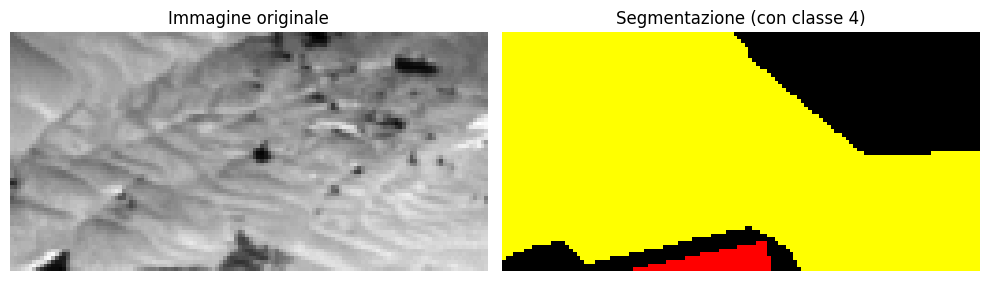

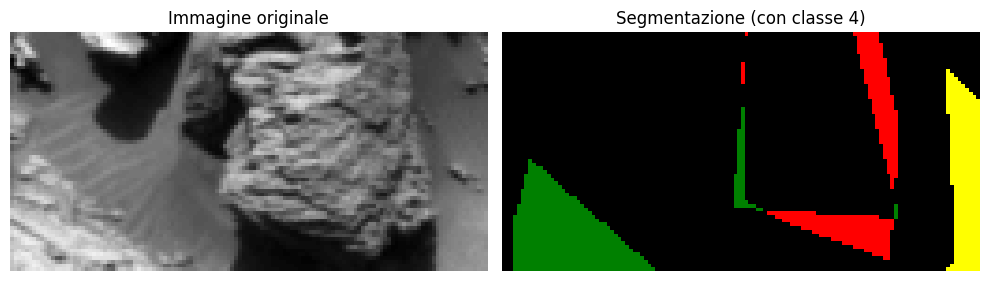

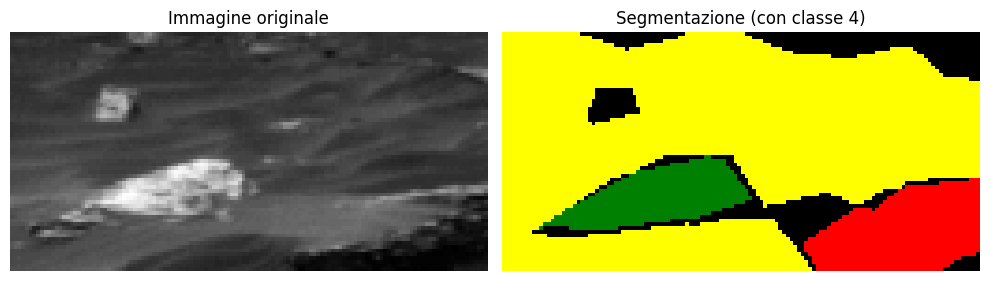

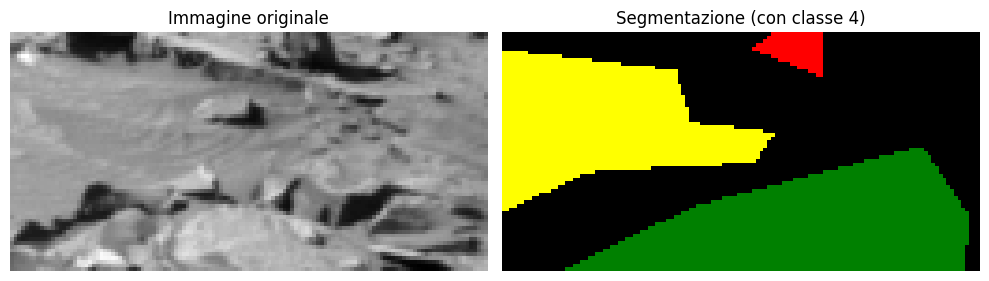

In [4]:
from matplotlib.colors import ListedColormap

# Trova gli indici delle immagini che contengono la classe 4
indices_with_class_4 = [i for i, label in enumerate(y_train) if 4 in label]

# Stampa alcune immagini che contengono la classe 4
for idx in indices_with_class_4[:20]:  # Visualizziamo le prime 10 immagini con classe 4
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    # Mostra l'immagine originale
    axs[0].imshow(X_train[idx], cmap='gray')
    axs[0].set_title("Immagine originale")
    axs[0].axis('off')
    
    # Mostra la segmentazione
    class_colors = ['black', 'purple', 'green', 'yellow', 'red']  # Colori per le classi [0, 1, 2, 3, 4]
    cmap = ListedColormap(class_colors)
    axs[1].imshow(y_train[idx], cmap=cmap, vmin=0, vmax=4)  # Usa una mappa di colori discreti per evidenziare le classi
    axs[1].set_title("Segmentazione (con classe 4)")
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

In [5]:
# Funzione per calcolare la percentuale di una classe in una maschera
def calculate_class_percentage(mask, class_label=4):
    total_pixels = mask.size  # Numero totale di pixel nell'immagine
    class_pixels = np.sum(mask == class_label)  # Pixel appartenenti alla classe specificata
    return (class_pixels / total_pixels) * 100

# Trova immagini con almeno il 5% di classe 4
images_with_class_4_5_percent = [i for i, mask in enumerate(y_train) if calculate_class_percentage(mask, class_label=4) >= 30]

# Conta quante sono
count_images_with_class_4_5_percent = len(images_with_class_4_5_percent)
print(f"Numero di immagini con almeno il 5% di classe 4: {count_images_with_class_4_5_percent}")

Numero di immagini con almeno il 5% di classe 4: 1


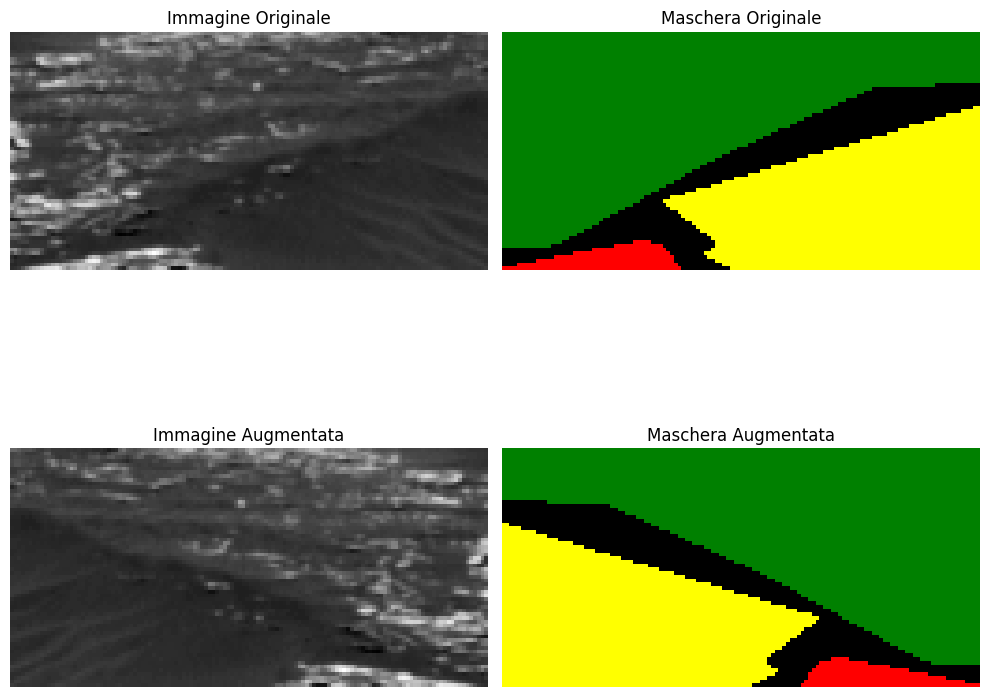

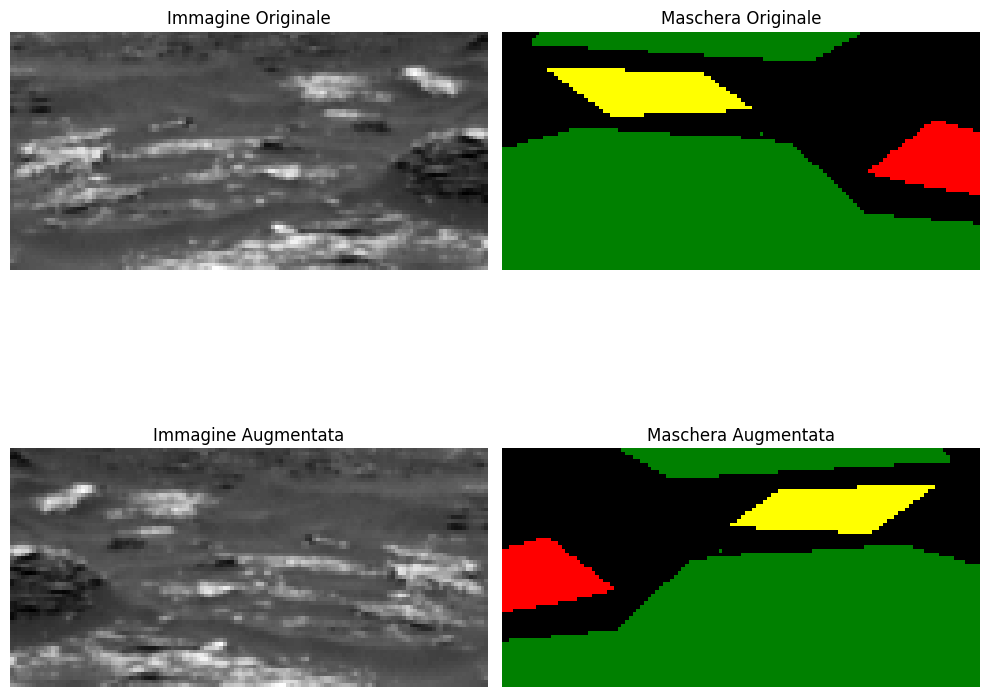

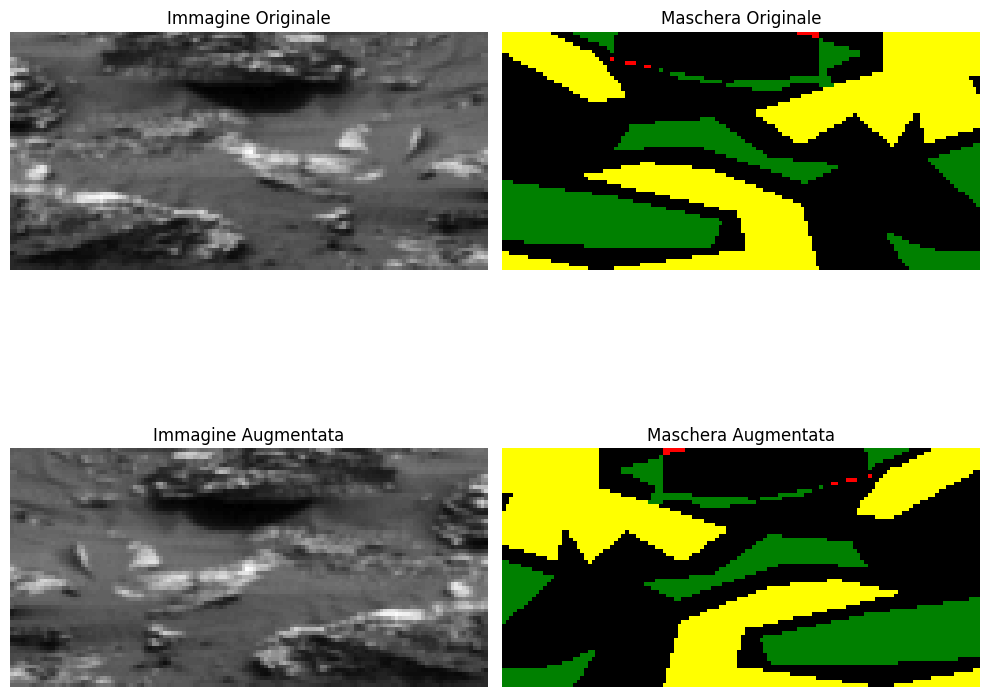

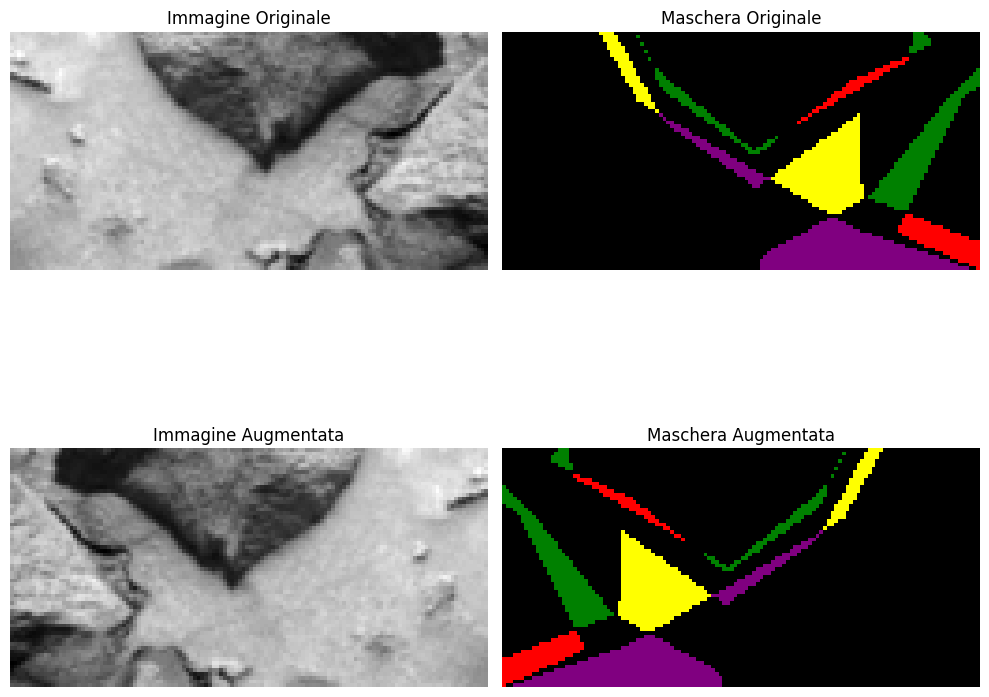

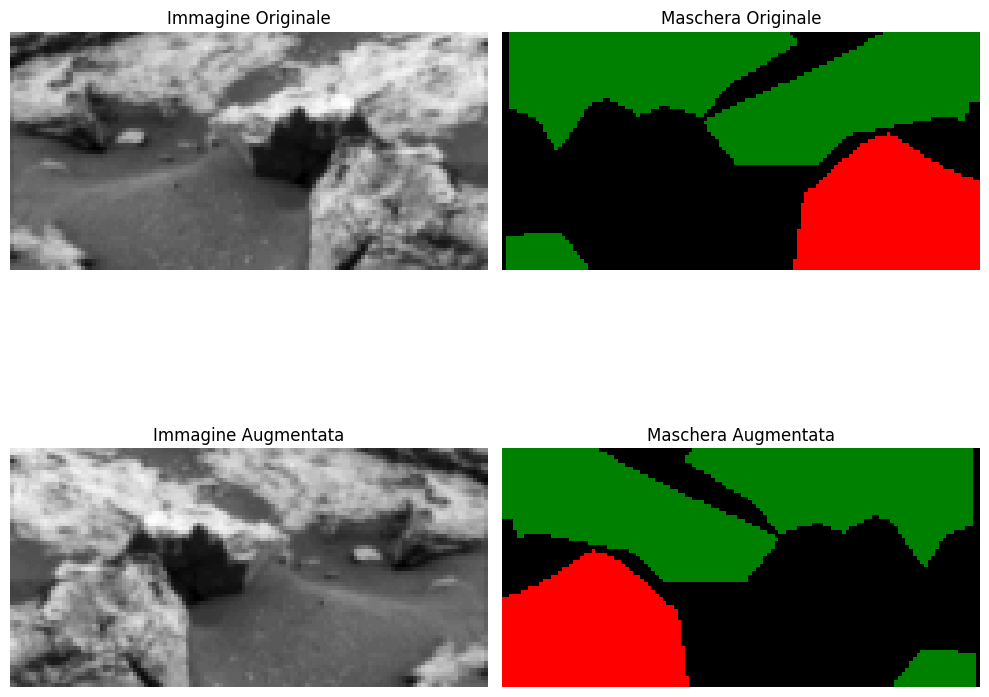

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configura il generatore di immagini per il flip orizzontale al 100%
datagen = ImageDataGenerator(preprocessing_function=lambda x: np.flip(x, axis=1))

# Trova immagini con classe 4
indices_with_class_4 = [i for i, mask in enumerate(y_train) if 4 in mask]

class_colors = ['black', 'purple', 'green', 'yellow', 'red']  # Colori per le classi [0, 1, 2, 3, 4]
cmap = ListedColormap(class_colors)

# Stampa immagini originali e augmentate
for idx in indices_with_class_4[:5]:  # Limitiamo a 5 immagini per visualizzazione
    image = X_train[idx]
    mask = y_train[idx]

    # Applica augmentation
    augmented_images = datagen.flow(image[np.newaxis, :, :, np.newaxis], batch_size=1)
    augmented_masks = datagen.flow(mask[np.newaxis, :, :, np.newaxis], batch_size=1)

    # Ottieni immagine e maschera augmentate
    augmented_image = next(augmented_images)[0].squeeze()
    augmented_mask = next(augmented_masks)[0].squeeze()

    # Plot dell'immagine originale e augmentata
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    
    # Immagine originale
    axs[0, 0].imshow(image, cmap='gray')
    axs[0, 0].set_title("Immagine Originale")
    axs[0, 0].axis('off')
    
    # Maschera originale
    axs[0, 1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    axs[0, 1].set_title("Maschera Originale")
    axs[0, 1].axis('off')
    
    # Immagine augmentata
    axs[1, 0].imshow(augmented_image, cmap='gray')
    axs[1, 0].set_title("Immagine Augmentata")
    axs[1, 0].axis('off')
    
    # Maschera augmentata
    axs[1, 1].imshow(augmented_mask, cmap=cmap, vmin=0, vmax=4)
    axs[1, 1].set_title("Maschera Augmentata")
    axs[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

### CutMix class 4

In [7]:
import numpy as np

def cutmix_with_class_4(image1, mask1, image2, mask2, class_label=4):
    """
    Applica CutMix inserendo un riquadro dalla seconda immagine (che contiene la classe 4)
    nella prima immagine in una regione senza classe 4.
    
    Args:
        image1, mask1: Prima immagine e maschera (destinazione).
        image2, mask2: Seconda immagine e maschera (origine).
        class_label: La classe target da inserire (default=4).
        
    Returns:
        mixed_image, mixed_mask: Immagine e maschera risultanti dopo CutMix.
    """
    h, w = image1.shape  # Ottieni altezza e larghezza
    
    # Trova i pixel con classe 4 nella seconda immagine
    class_4_pixels = np.where(mask2 == class_label)
    if len(class_4_pixels[0]) == 0:
        raise ValueError("La seconda immagine non contiene pixel della classe 4.")
    
    # Seleziona un riquadro dalla seconda immagine
    min_y, max_y = np.min(class_4_pixels[0]), np.max(class_4_pixels[0])
    min_x, max_x = np.min(class_4_pixels[1]), np.max(class_4_pixels[1])
    
    # Aggiungi un margine casuale per il riquadro
    margin = 5  # Pixels
    y1 = max(min_y - margin, 0)
    y2 = min(max_y + margin, h)
    x1 = max(min_x - margin, 0)
    x2 = min(max_x + margin, w)
    
    cut_region_image = image2[y1:y2, x1:x2]
    cut_region_mask = mask2[y1:y2, x1:x2]
    
    # Trova una regione senza classe 4 nell'immagine di destinazione
    empty_regions = np.where(mask1 != class_label)
    if len(empty_regions[0]) == 0:
        raise ValueError("Non ci sono regioni senza classe 4 nella prima immagine.")
    
    # Scegli una posizione casuale tra i pixel senza classe 4
    rand_idx = np.random.choice(len(empty_regions[0]))
    center_y, center_x = empty_regions[0][rand_idx], empty_regions[1][rand_idx]
    
    # Posiziona il riquadro nell'immagine di destinazione
    cut_h, cut_w = cut_region_image.shape
    dest_y1 = max(center_y - cut_h // 2, 0)
    dest_y2 = min(dest_y1 + cut_h, h)
    dest_x1 = max(center_x - cut_w // 2, 0)
    dest_x2 = min(dest_x1 + cut_w, w)
    
    # Inserisci il riquadro nella prima immagine
    mixed_image = image1.copy()
    mixed_mask = mask1.copy()
    
    mixed_image[dest_y1:dest_y2, dest_x1:dest_x2] = cut_region_image[:dest_y2-dest_y1, :dest_x2-dest_x1]
    mixed_mask[dest_y1:dest_y2, dest_x1:dest_x2] = cut_region_mask[:dest_y2-dest_y1, :dest_x2-dest_x1]
    
    return mixed_image, mixed_mask

Example 1:
  Unique values in mask1: [0. 3. 4.]
  Unique values in mask2: [0. 2. 3. 4.]
  Unique values in mixed_mask: [0. 2. 3. 4.]
Example 2:
  Unique values in mask1: [0. 1. 2. 3. 4.]
  Unique values in mask2: [0. 2. 4.]
  Unique values in mixed_mask: [0. 1. 2. 3. 4.]
Example 3:
  Unique values in mask1: [0. 1. 2. 3. 4.]
  Unique values in mask2: [0. 1. 4.]
  Unique values in mixed_mask: [0. 1. 2. 3. 4.]
Example 4:
  Unique values in mask1: [0. 1. 2. 4.]
  Unique values in mask2: [0. 1. 4.]
  Unique values in mixed_mask: [0. 1. 2. 4.]
Example 5:
  Unique values in mask1: [0. 2. 3. 4.]
  Unique values in mask2: [0. 3. 4.]
  Unique values in mixed_mask: [0. 2. 3. 4.]
Example 6:
  Unique values in mask1: [0. 1. 4.]
  Unique values in mask2: [0. 2. 3. 4.]
  Unique values in mixed_mask: [0. 1. 2. 3. 4.]
Example 7:
  Unique values in mask1: [0. 2. 3. 4.]
  Unique values in mask2: [0. 2. 3. 4.]
  Unique values in mixed_mask: [0. 2. 3. 4.]
Example 8:
  Unique values in mask1: [0. 2. 3. 4.]


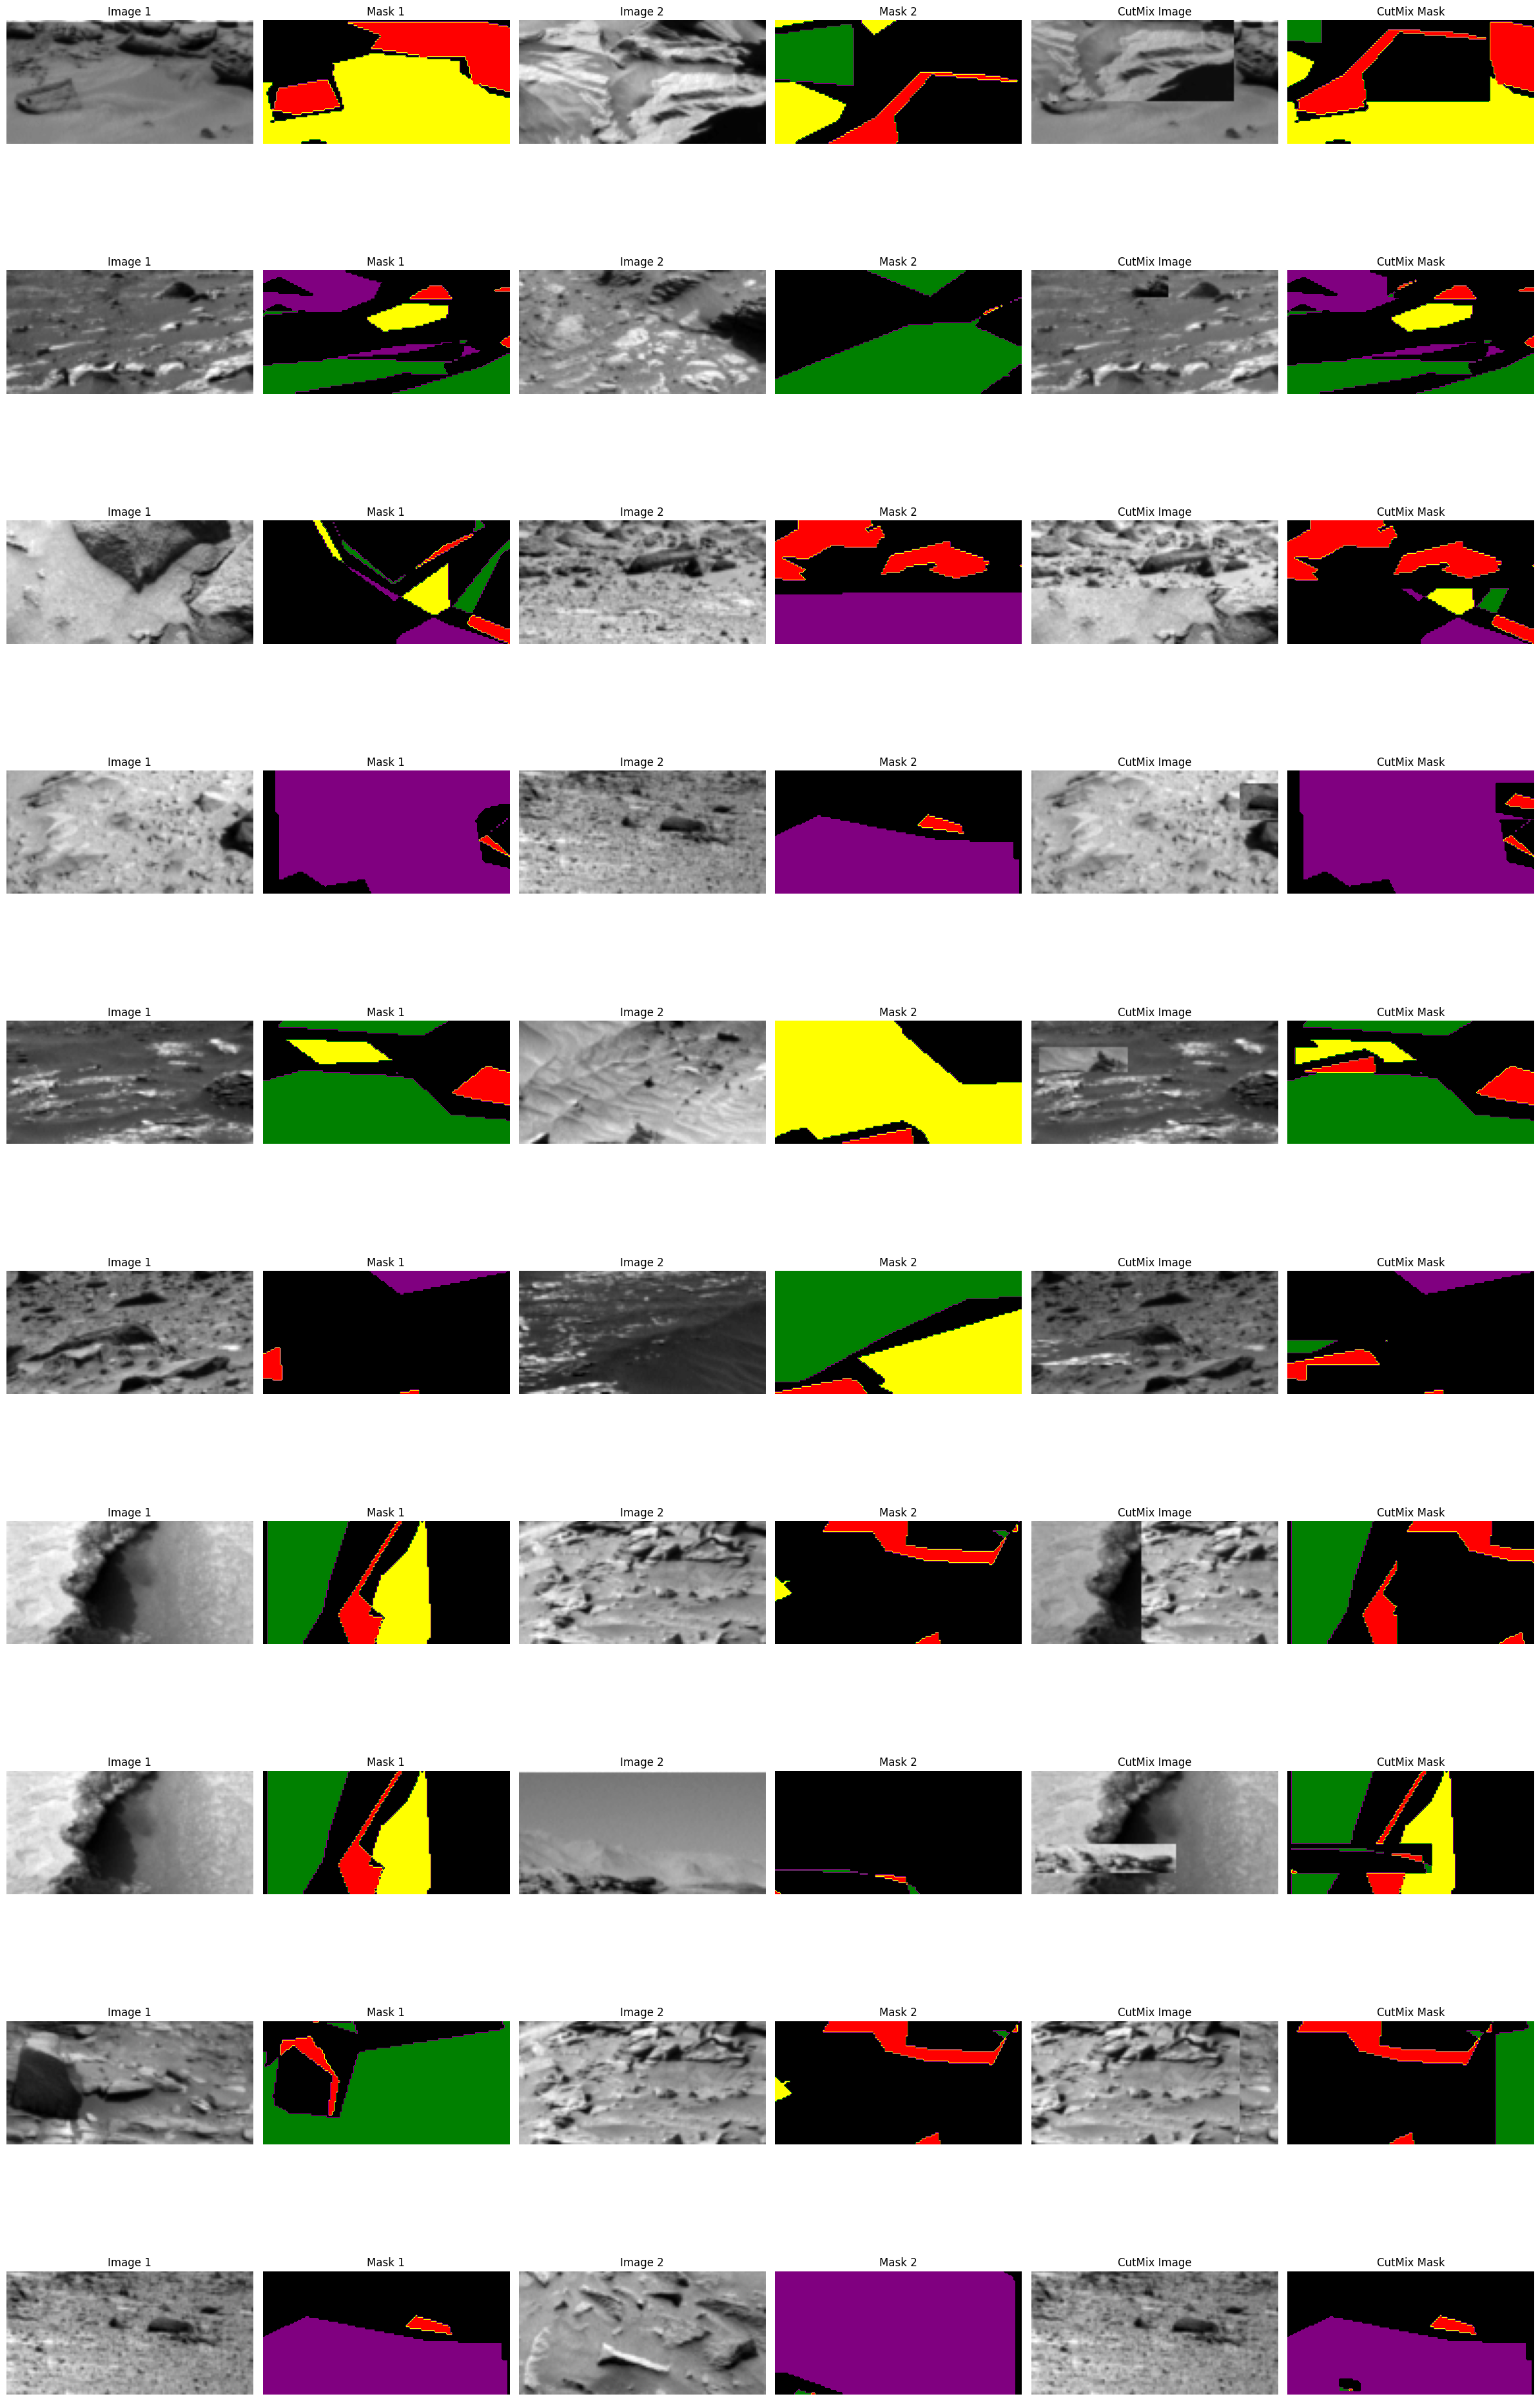

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Funzione per visualizzare esempi di CutMix
def visualize_cutmix_examples_with_class_4(X_train, y_train, indices_with_class_4, num_examples=10):
    """
    Visualizza esempi di CutMix solo per immagini che contengono la classe 4.
    
    Args:
        X_train: Dataset di immagini.
        y_train: Dataset di maschere.
        indices_with_class_4: Indici delle immagini che contengono la classe 4.
        num_examples: Numero di esempi da visualizzare.
    """
    # Colormap personalizzata per le maschere
    cmap = ListedColormap(['black', 'purple', 'green', 'yellow', 'red'])  # Assumi valori 0, 1, 2, 3, 4
    
    fig, axs = plt.subplots(num_examples, 6, figsize=(24, 4 * num_examples))

    for i in range(num_examples):
        # Prendi due immagini casuali che contengono la classe 4
        idx1, idx2 = np.random.choice(indices_with_class_4, size=2, replace=False)
        img1, mask1 = X_train[idx1], y_train[idx1]
        img2, mask2 = X_train[idx2], y_train[idx2]
        
        # Applica CutMix
        mixed_image, mixed_mask = cutmix_with_class_4(img1, mask1, img2, mask2)

        # Valori unici nelle maschere (debug)
        print(f"Example {i + 1}:")
        print(f"  Unique values in mask1: {np.unique(mask1)}")
        print(f"  Unique values in mask2: {np.unique(mask2)}")
        print(f"  Unique values in mixed_mask: {np.unique(mixed_mask)}")

        # Visualizza l'immagine e la maschera originale 1
        axs[i, 0].imshow(img1, cmap="gray")
        axs[i, 0].set_title(f"Image 1")
        axs[i, 0].axis("off")
        
        axs[i, 1].imshow(mask1, cmap=cmap, vmin=0, vmax=4)
        axs[i, 1].set_title(f"Mask 1")
        axs[i, 1].axis("off")
        
        # Visualizza l'immagine e la maschera originale 2
        axs[i, 2].imshow(img2, cmap="gray")
        axs[i, 2].set_title(f"Image 2")
        axs[i, 2].axis("off")
        
        axs[i, 3].imshow(mask2, cmap=cmap, vmin=0, vmax=4)
        axs[i, 3].set_title(f"Mask 2")
        axs[i, 3].axis("off")
        
        # Visualizza l'immagine CutMixata
        axs[i, 4].imshow(mixed_image, cmap="gray")
        axs[i, 4].set_title("CutMix Image")
        axs[i, 4].axis("off")
        
        # Visualizza la maschera CutMixata
        axs[i, 5].imshow(mixed_mask, cmap=cmap, vmin=0, vmax=4)
        axs[i, 5].set_title("CutMix Mask")
        axs[i, 5].axis("off")

    plt.tight_layout()
    plt.show()

# Trova gli indici delle immagini che contengono la classe 4
indices_with_class_4 = [i for i, mask in enumerate(y_train) if 4 in mask]

# Esegui la funzione di visualizzazione
visualize_cutmix_examples_with_class_4(X_train, y_train, indices_with_class_4, num_examples=10)

### Visualize some images from the test set

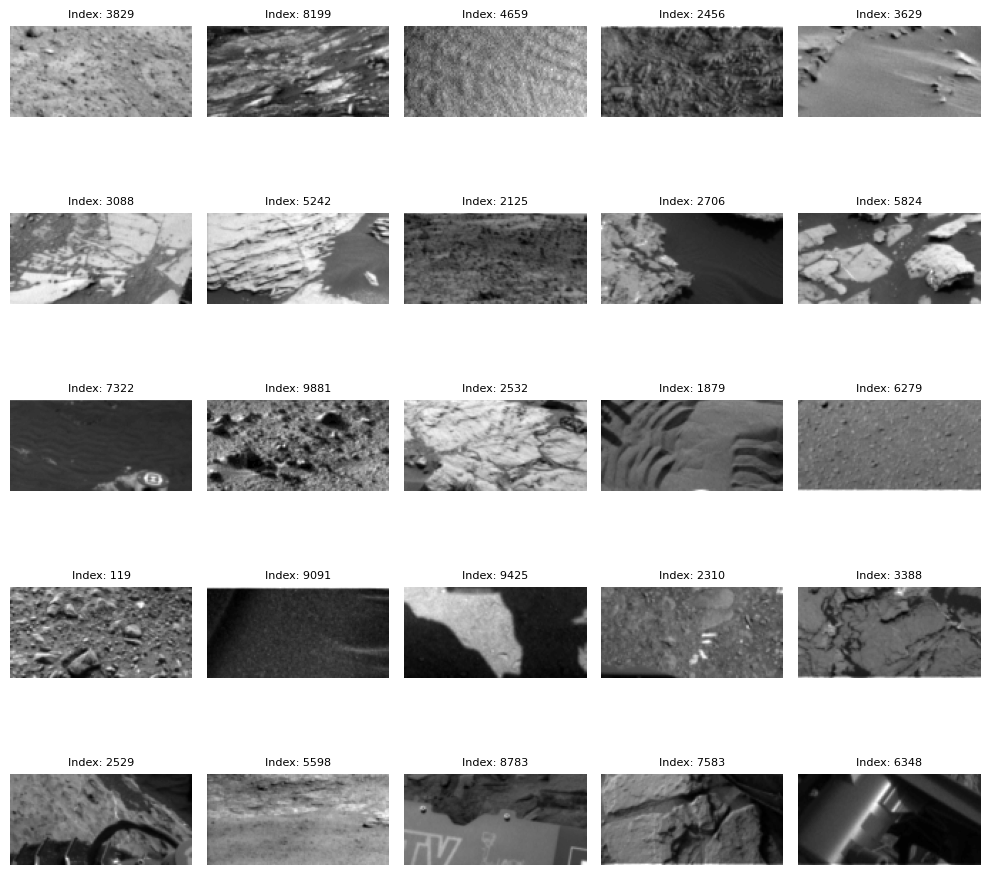

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_random_images(test_set, num_images=25):
    """
    Stampa un numero casuale di immagini dal test set in una griglia.
    
    Args:
        test_set (numpy array): Set di immagini (assumendo che abbia shape (N, H, W)).
        num_images (int): Numero di immagini da mostrare (default: 25).
    """
    # Verifica che il numero di immagini richiesto non ecceda la dimensione del test set
    num_images = min(num_images, len(test_set))
    
    # Seleziona randomicamente gli indici
    indices = np.random.choice(len(test_set), num_images, replace=False)
    
    # Imposta la griglia (5x5)
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    axes = axes.flatten()
    
    for idx, ax in zip(indices, axes):
        ax.imshow(test_set[idx], cmap='gray')  # Visualizza immagine in scala di grigi
        ax.axis('off')  # Rimuove gli assi
        ax.set_title(f"Index: {idx}", fontsize=8)
    
    # Nascondi assi non utilizzati se ci sono meno di 25 immagini
    for ax in axes[num_images:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usa la funzione sul test set
plot_random_images(X_test, num_images=25)


### Visualize some images and their masks from the training set

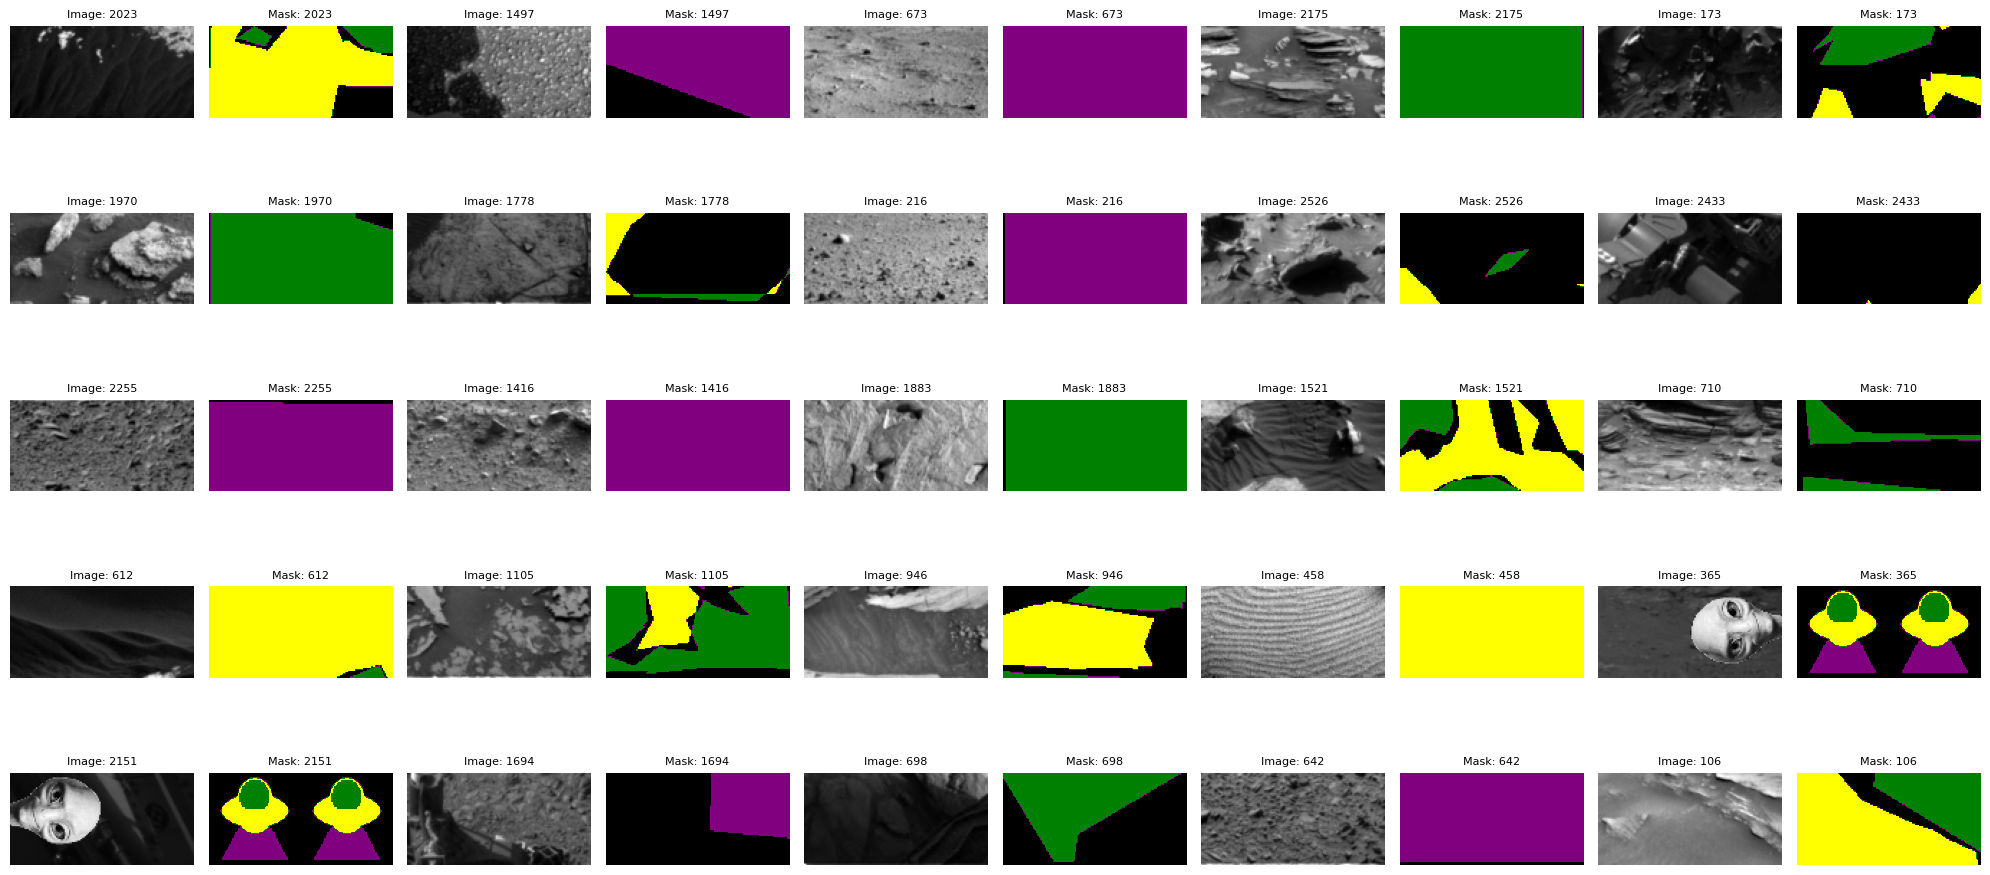

In [10]:
from matplotlib.colors import ListedColormap

def plot_random_images_with_masks(X, y, num_images=25):
    """
    Stampa un numero casuale di immagini dal training set insieme alle rispettive maschere in una griglia.
    
    Args:
        X (numpy array): Set di immagini di input (assumendo shape (N, H, W)).
        y (numpy array): Set di maschere (assumendo shape (N, H, W)).
        num_images (int): Numero di immagini da mostrare (default: 25).
    """
    # Verifica che il numero di immagini richiesto non ecceda la dimensione del training set
    num_images = min(num_images, len(X))
    
    # Seleziona randomicamente gli indici
    indices = np.random.choice(len(X), num_images, replace=False)
    
    # Imposta la griglia (5x10) con immagini e maschere
    fig, axes = plt.subplots(5, 10, figsize=(20, 10))
    axes = axes.flatten()
    
    for idx, ax in zip(indices, axes[::2]):  # Associa assi dispari per immagini
        ax.imshow(X[idx], cmap='gray')  # Visualizza immagine in scala di grigi
        ax.axis('off')  # Rimuove gli assi
        ax.set_title(f"Image: {idx}", fontsize=8)
    
    for idx, ax in zip(indices, axes[1::2]):  # Associa assi pari per maschere
        # Definizione della mappa di colori per le classi
        class_colors = ['black', 'purple', 'green', 'yellow', 'red']  # Colori per le classi [0, 1, 2, 3, 4]
        cmap = ListedColormap(class_colors)
        ax.imshow(y[idx], cmap=cmap, vmin=0, vmax=len(np.unique(y)) - 1)  # Usa colormap per maschere
        ax.axis('off')  # Rimuove gli assi
        ax.set_title(f"Mask: {idx}", fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Usa la funzione sul training set
plot_random_images_with_masks(X_train, y_train, num_images=25)

### CutMix

Unique values in mask1: [0. 1. 2.]
Unique values in mask2: [0. 1.]
Unique values in mixed_mask: [0. 1. 2.]
Unique values in mask1: [0. 1. 3.]
Unique values in mask2: [3.]
Unique values in mixed_mask: [0. 1. 3.]
Unique values in mask1: [0. 1. 2. 3.]
Unique values in mask2: [0. 2. 3.]
Unique values in mixed_mask: [0. 1. 2. 3.]
Unique values in mask1: [1.]
Unique values in mask2: [0.]
Unique values in mixed_mask: [0. 1.]
Unique values in mask1: [0. 1.]
Unique values in mask2: [0. 2.]
Unique values in mixed_mask: [0. 1.]


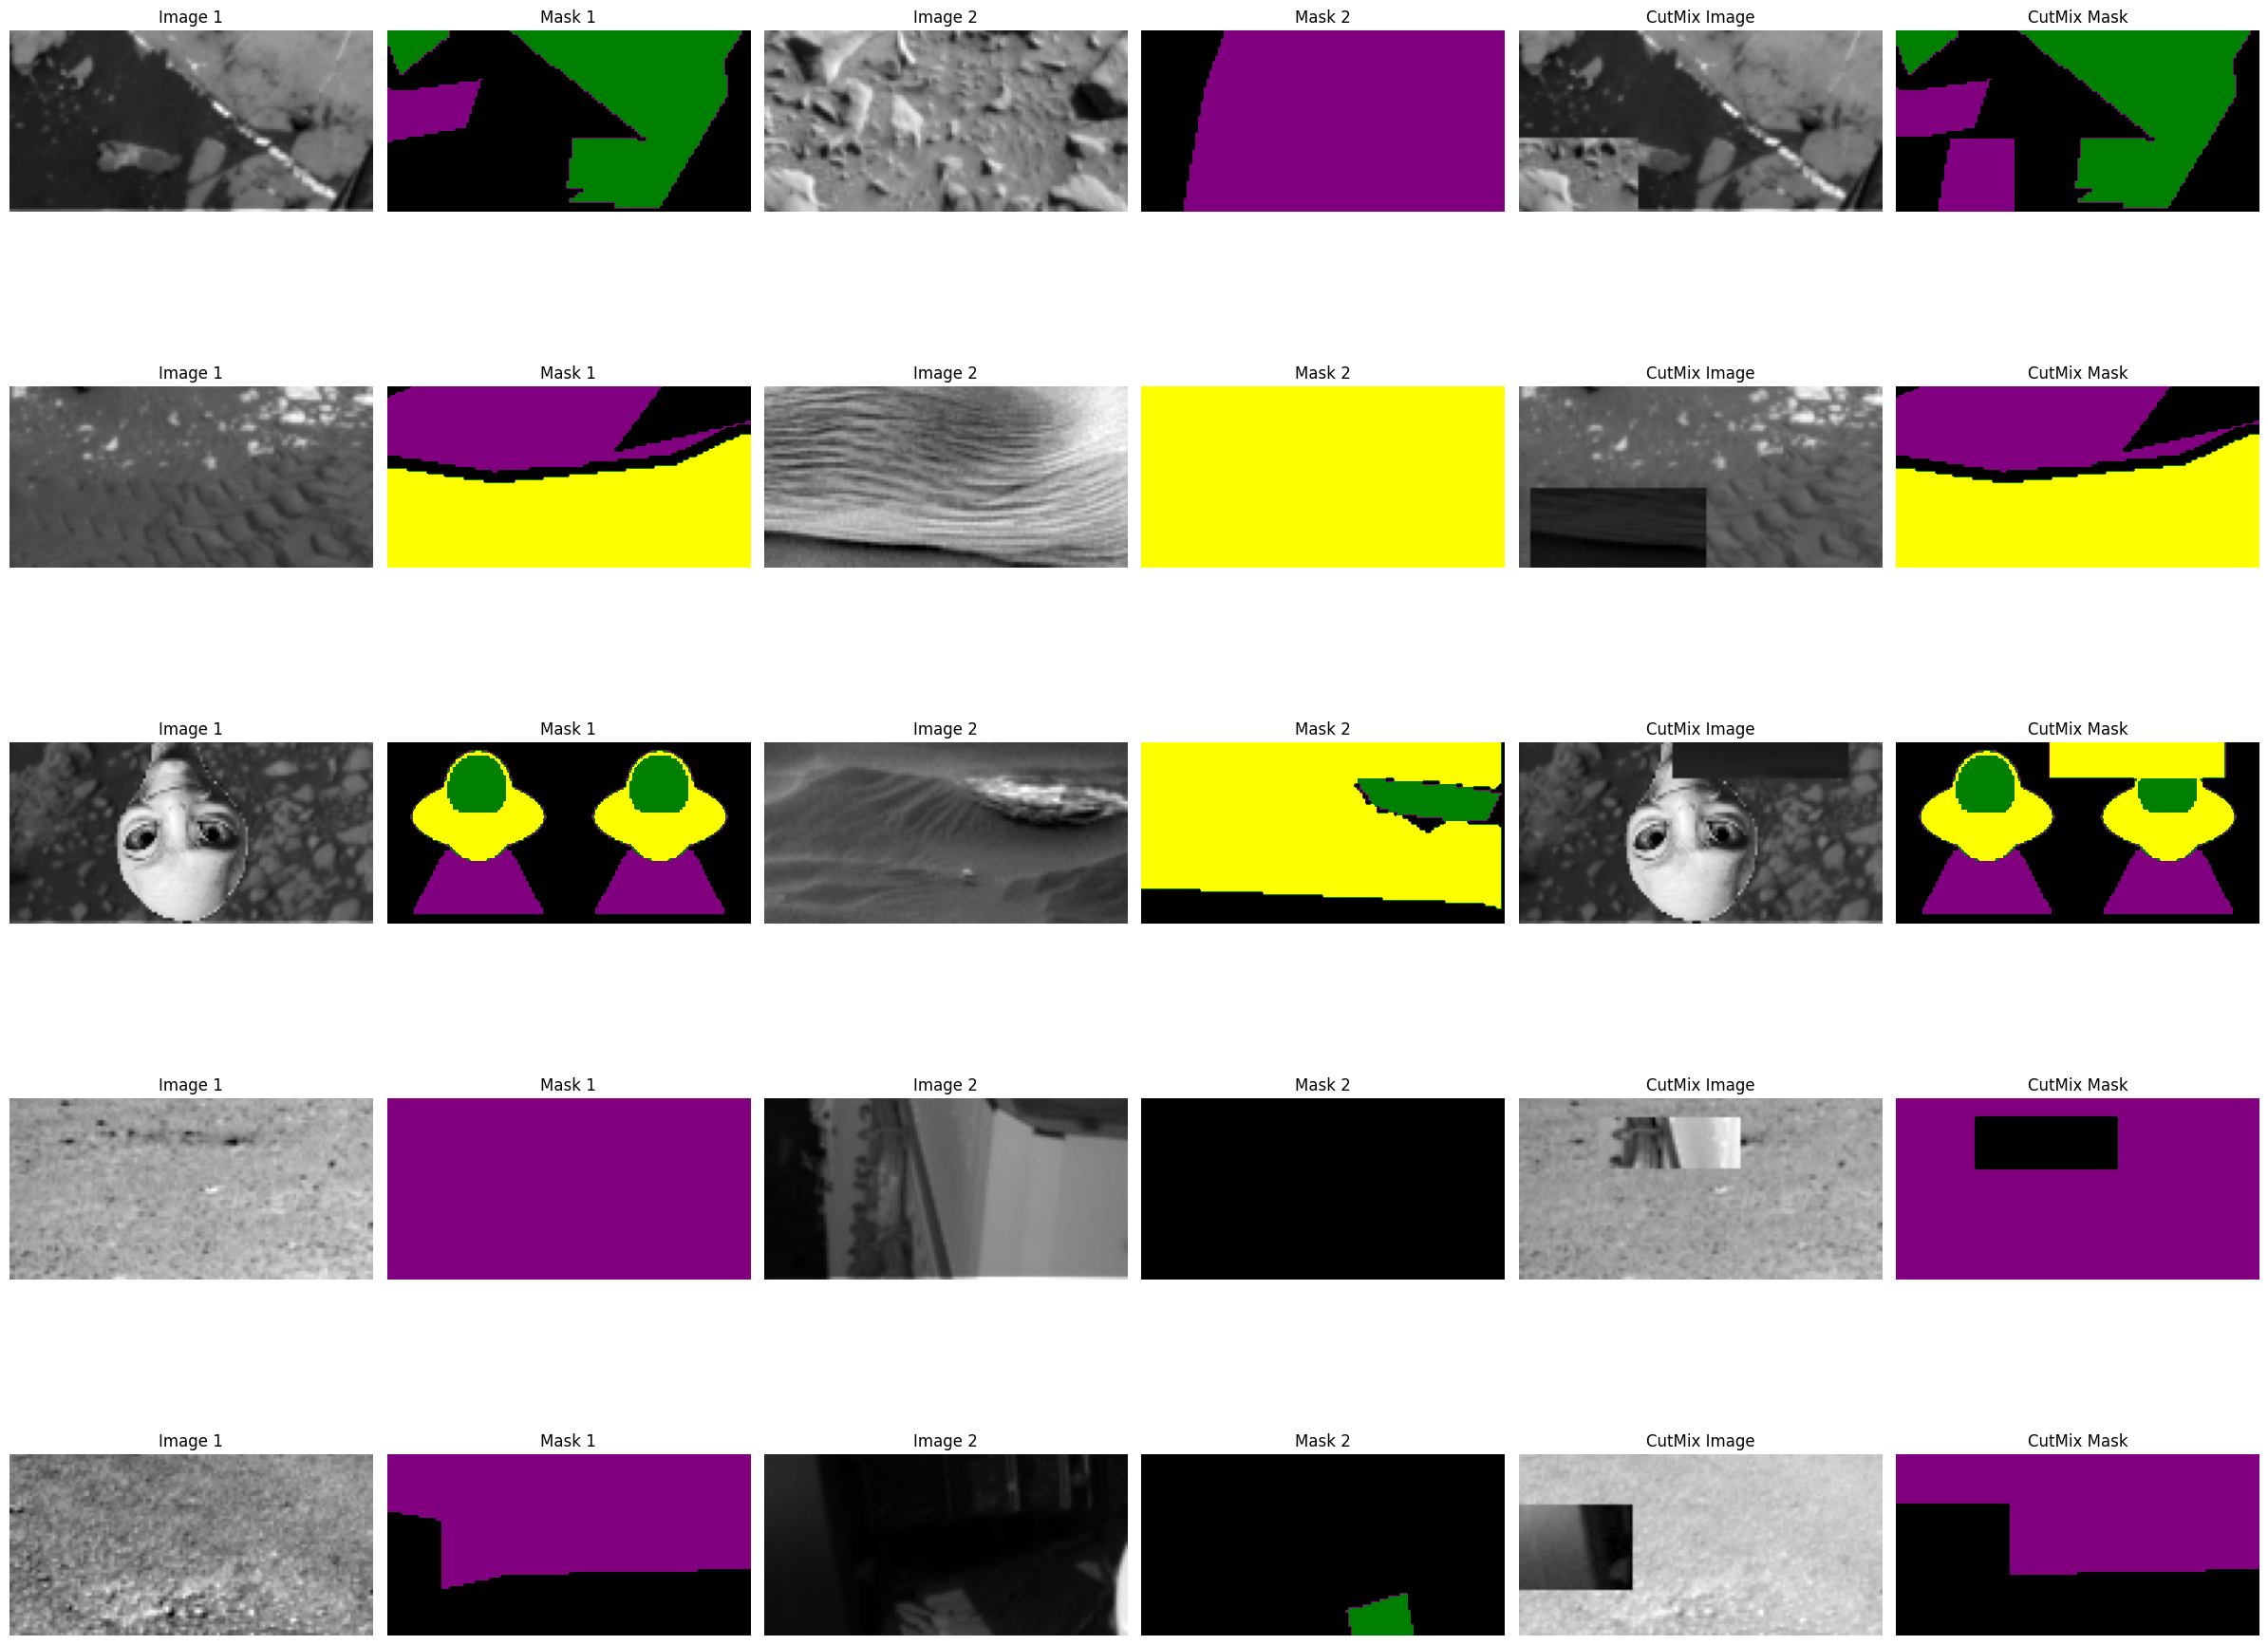

In [11]:
import matplotlib.pyplot as plt

def cutmix(image1, mask1, image2, mask2):
    """
    Applica CutMix a due immagini e maschere.
    
    Args:
        image1, image2: Immagini in scala di grigi (H, W).
        mask1, mask2: Maschere corrispondenti (H, W).
        
    Returns:
        Tuple: Immagine e maschera CutMix.
    """
    h, w = image1.shape
    # Genera coordinate casuali per il ritaglio
    cut_x = np.random.randint(0, w)
    cut_y = np.random.randint(0, h)
    cut_w = np.random.randint(w // 4, w // 2)
    cut_h = np.random.randint(h // 4, h // 2)
    
    # Definisci i limiti del rettangolo
    x1 = np.clip(cut_x - cut_w // 2, 0, w)
    x2 = np.clip(cut_x + cut_w // 2, 0, w)
    y1 = np.clip(cut_y - cut_h // 2, 0, h)
    y2 = np.clip(cut_y + cut_h // 2, 0, h)
    
    # Crea immagine e maschera CutMix
    mixed_image = image1.copy()
    mixed_image[y1:y2, x1:x2] = image2[y1:y2, x1:x2]
    
    mixed_mask = mask1.copy()
    mixed_mask[y1:y2, x1:x2] = mask2[y1:y2, x1:x2]

    return mixed_image, mixed_mask

# Visualizzazione di esempi
def visualize_cutmix_examples(X_train, y_train, num_examples=5):
    fig, axs = plt.subplots(num_examples, 6, figsize=(24, 4 * num_examples))

    # Definizione della colormap personalizzata
    cmap = ListedColormap(['black', 'purple', 'green', 'yellow', 'red'])  # Assumi che i valori siano 0, 1, 2, 3, 4

    for i in range(num_examples):
        # Prendi due immagini casuali
        idx1, idx2 = np.random.choice(len(X_train), size=2, replace=False)
        img1, mask1 = X_train[idx1], y_train[idx1]
        img2, mask2 = X_train[idx2], y_train[idx2]
        
        # Applica CutMix
        mixed_image, mixed_mask = cutmix(img1, mask1, img2, mask2)

        # Stampa i valori unici delle maschere per debug
        print(f"Unique values in mask1: {np.unique(mask1)}")
        print(f"Unique values in mask2: {np.unique(mask2)}")
        print(f"Unique values in mixed_mask: {np.unique(mixed_mask)}")

        # Visualizza l'immagine e la maschera originale 1
        axs[i, 0].imshow(img1, cmap="gray")
        axs[i, 0].set_title(f"Image 1")
        axs[i, 0].axis("off")
        
        axs[i, 1].imshow(mask1, cmap=cmap, vmin=0, vmax=4)  # Mantieni i valori originali
        axs[i, 1].set_title(f"Mask 1")
        axs[i, 1].axis("off")
        
        # Visualizza l'immagine e la maschera originale 2
        axs[i, 2].imshow(img2, cmap="gray")
        axs[i, 2].set_title(f"Image 2")
        axs[i, 2].axis("off")
        
        axs[i, 3].imshow(mask2, cmap=cmap, vmin=0, vmax=4)  # Mantieni i valori originali
        axs[i, 3].set_title(f"Mask 2")
        axs[i, 3].axis("off")
        
        # Visualizza l'immagine CutMixata
        axs[i, 4].imshow(mixed_image, cmap="gray")
        axs[i, 4].set_title("CutMix Image")
        axs[i, 4].axis("off")
        
        # Visualizza la maschera CutMixata
        axs[i, 5].imshow(mixed_mask, cmap=cmap, vmin=0, vmax=4)  # Mantieni i valori originali
        axs[i, 5].set_title("CutMix Mask")
        axs[i, 5].axis("off")

    plt.tight_layout()
    plt.show()


# Applica la funzione di visualizzazione
visualize_cutmix_examples(X_train, y_train, num_examples=5)

### Flip

In [12]:
@tf.function
def augment_image_and_mask(image, mask):
    """
    Applica augmentation con flip orizzontale casuale a immagine e maschera.
    """
    # Aggiungi una dimensione del canale alla maschera e immagine se necessario
    if len(image.shape) == 2:  # Controlla se l'immagine è bidimensionale
        image = tf.expand_dims(image, axis=-1)  # Aggiungi una dimensione del canale
    if len(mask.shape) == 2:  # Controlla se la maschera è bidimensionale
        mask = tf.expand_dims(mask, axis=-1)  # Aggiungi una dimensione del canale

    # Flip orizzontale casuale
    #if tf.random.uniform([]) > 0.5:
    image = tf.image.flip_left_right(image)
    mask = tf.image.flip_left_right(mask)

    return image, mask

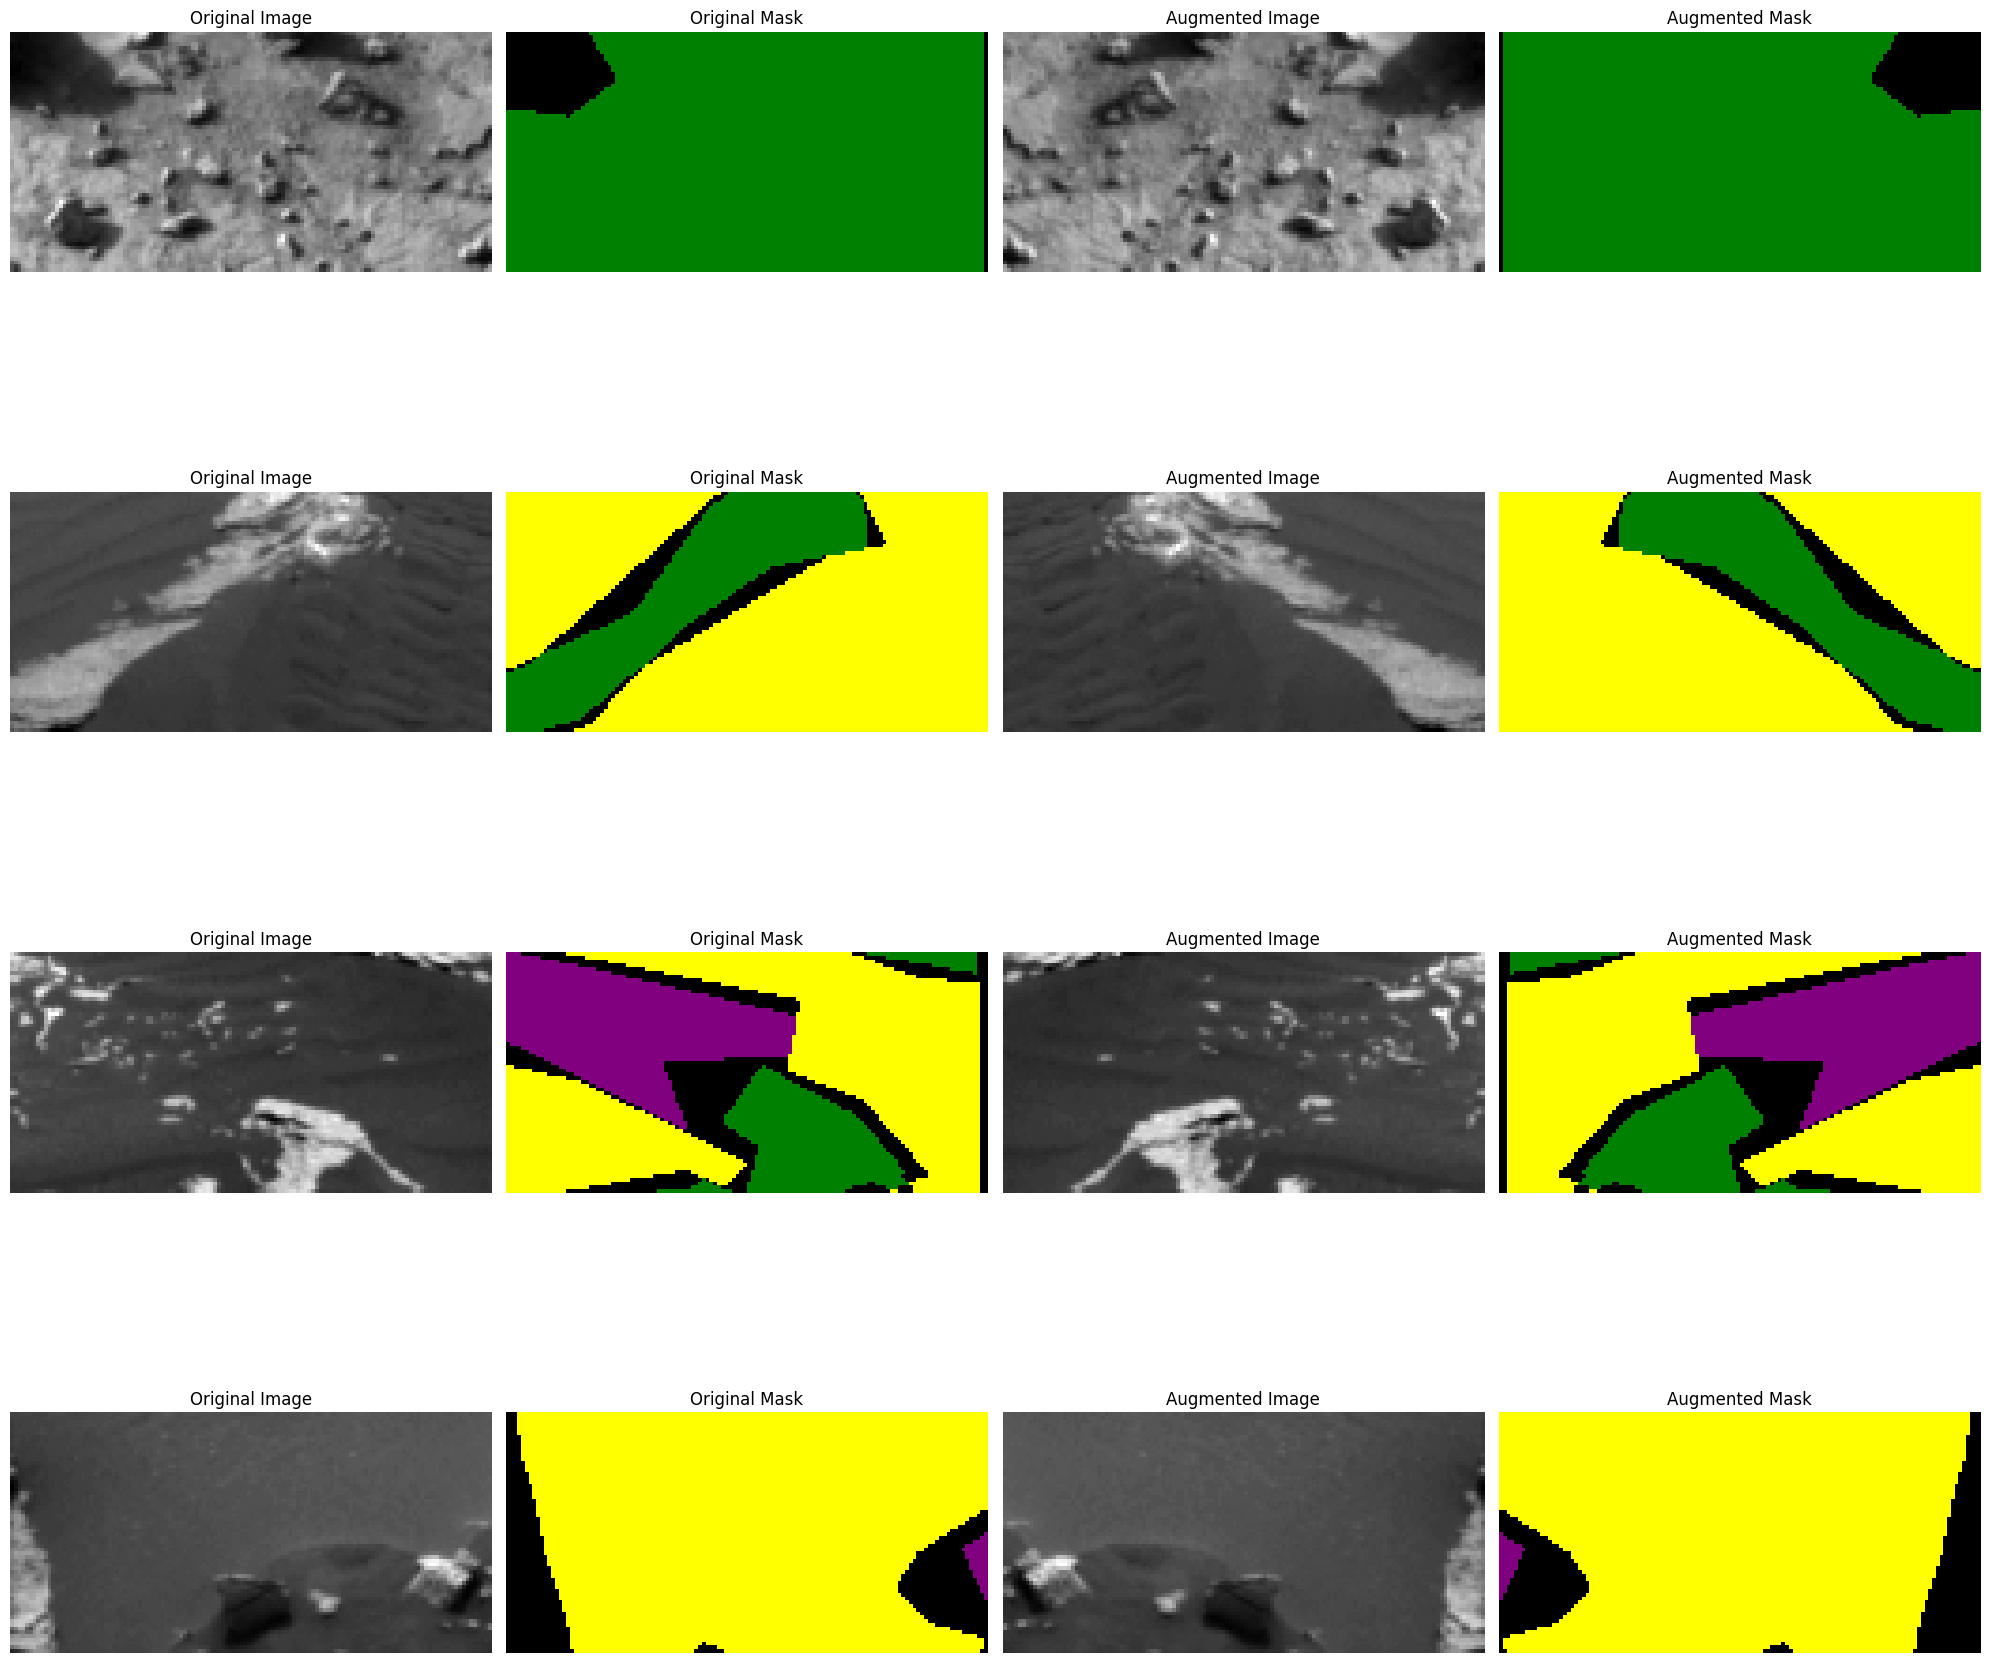

In [13]:
def visualize_augmentation_tf(X_train, y_train, num_examples=4):
    """
    Visualizza esempi di augmentation usando la funzione augment_image_and_mask.
    
    Args:
        X_train: Immagini originali (array numpy).
        y_train: Maschere originali (array numpy).
        num_examples: Numero di esempi da mostrare.
    """
    fig, axs = plt.subplots(num_examples, 4, figsize=(20, 5 * num_examples))

    # Colormap per le maschere
    cmap = ListedColormap(['black', 'purple', 'green', 'yellow', 'red'])

    for i in range(num_examples):
        # Prendi un'immagine e una maschera casuale
        idx = np.random.randint(0, len(X_train))
        img, mask = X_train[idx], y_train[idx]

        # Assicurati che abbiano almeno 3 dimensioni
        if len(img.shape) == 2:
            img = np.expand_dims(img, axis=-1)
        if len(mask.shape) == 2:
            mask = np.expand_dims(mask, axis=-1)

        # Applica la funzione di augmentation
        img_tf = tf.convert_to_tensor(img, dtype=tf.float32)
        mask_tf = tf.convert_to_tensor(mask, dtype=tf.int32)
        augmented_img, augmented_mask = augment_image_and_mask(img_tf, mask_tf)

        # Converti il risultato in numpy per la visualizzazione
        augmented_img = augmented_img.numpy()
        augmented_mask = augmented_mask.numpy()

        # Rimuovi la dimensione del canale per la visualizzazione
        img = img[:, :, 0]
        mask = mask[:, :, 0]
        augmented_img = augmented_img[:, :, 0]
        augmented_mask = augmented_mask[:, :, 0]

        # Visualizza immagine originale
        axs[i, 0].imshow(img, cmap="gray")
        axs[i, 0].set_title("Original Image")
        axs[i, 0].axis("off")

        # Visualizza maschera originale
        axs[i, 1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
        axs[i, 1].set_title("Original Mask")
        axs[i, 1].axis("off")

        # Visualizza immagine aumentata
        axs[i, 2].imshow(augmented_img, cmap="gray")
        axs[i, 2].set_title("Augmented Image")
        axs[i, 2].axis("off")

        # Visualizza maschera aumentata
        axs[i, 3].imshow(augmented_mask, cmap=cmap, vmin=0, vmax=4)
        axs[i, 3].set_title("Augmented Mask")
        axs[i, 3].axis("off")

    plt.tight_layout()
    plt.show()

# Applica la funzione di visualizzazione
visualize_augmentation_tf(X_train, y_train, num_examples=4)

In [14]:
# Unisci X_train e y_train lungo una nuova dimensione
combined = np.stack((X_train, y_train), axis=1)  # Shape: (2615, 2, 64, 128)

# Trova i duplicati basandoti su tutte le dimensioni
unique_combined, indices = np.unique(combined, return_index=True, axis=0)

# Trova gli indici eliminati
all_indices = np.arange(len(combined))
eliminated_indices = np.setdiff1d(all_indices, indices)

# Visualizza alcune immagini eliminate
if len(eliminated_indices) > 0:
    print(f"Numero di duplicati eliminati: {len(eliminated_indices)}")
    fig, axs = plt.subplots(2, len(eliminated_indices[:5]), figsize=(15, 6))  # Mostra massimo 5 esempi
    for i, idx in enumerate(eliminated_indices[:5]):
        # Mostra immagine e maschera
        axs[0, i].imshow(X_train[idx], cmap='gray')
        axs[0, i].set_title(f"Duplicato Img {idx}")
        axs[0, i].axis('off')
        
        axs[1, i].imshow(y_train[idx], cmap='gray')
        axs[1, i].set_title(f"Duplicato Label {idx}")
        axs[1, i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Nessun duplicato trovato.")

Nessun duplicato trovato.


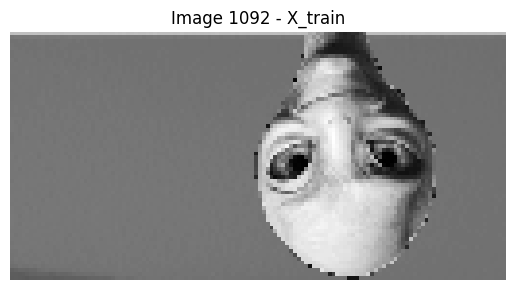

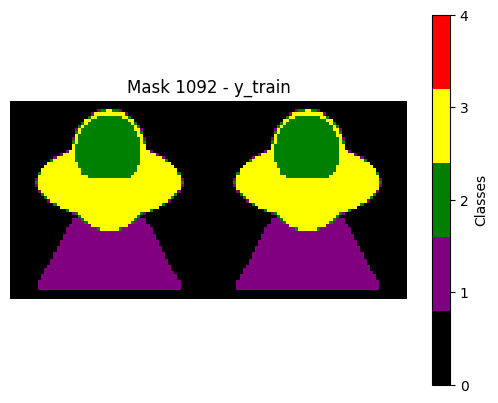

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Definizione della mappa di colori per le classi
class_colors = ['black', 'purple', 'green', 'yellow', 'red']  # Colori per le classi [0, 1, 2, 3, 4]
cmap = ListedColormap(class_colors)

a = 1092

# Stampa l'immagine 40 da X_train
plt.imshow(X_train[a], cmap='gray')  # Usa cmap='gray' per immagini in scala di grigi
plt.title(f"Image {a} - X_train")  # Usa un f-string per incorporare il valore di 'a'
plt.axis('off')  # Rimuove gli assi per una visualizzazione pulita
plt.show()

# Stampa la maschera corrispondente da y_train con colori
plt.imshow(y_train[a], cmap=cmap, vmin=0, vmax=4)  # Usa la mappa personalizzata
plt.title(f"Mask {a} - y_train")
plt.colorbar(ticks=range(5), label="Classes")  # Aggiunge una legenda per le classi
plt.axis('off')
plt.show()

Media generale: 61.66
Intervallo accettabile: 11.66 - 111.66
Numero di immagini fuori range: 12


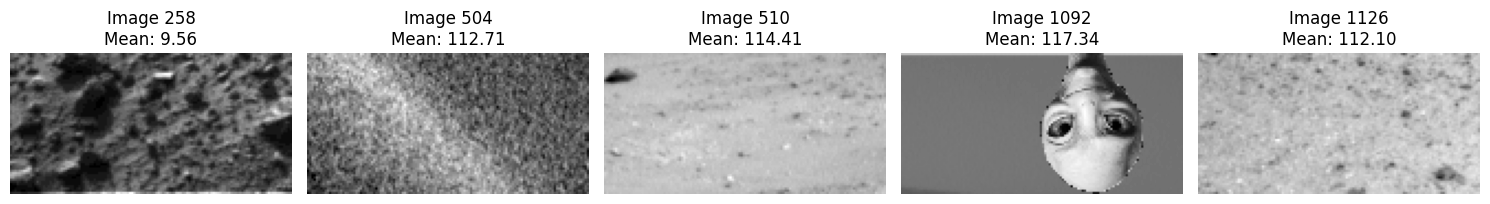

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Calcola la media dei pixel per ogni immagine
pixel_means = [np.mean(img) for img in X_train]

# Calcola la media generale e il range di accettabilità
global_mean = np.mean(pixel_means)
tolerance = 50  # Imposta una tolleranza (puoi modificarla)
lower_bound = global_mean - tolerance
upper_bound = global_mean + tolerance

print(f"Media generale: {global_mean:.2f}")
print(f"Intervallo accettabile: {lower_bound:.2f} - {upper_bound:.2f}")

# Trova gli indici delle immagini fuori dal range
out_of_range_indices = [i for i, mean in enumerate(pixel_means) if mean < lower_bound or mean > upper_bound]

print(f"Numero di immagini fuori range: {len(out_of_range_indices)}")

# Visualizza alcune immagini fuori range
if len(out_of_range_indices) > 0:
    fig, axs = plt.subplots(1, min(5, len(out_of_range_indices)), figsize=(15, 15))  # Mostra massimo 5 immagini
    for i, idx in enumerate(out_of_range_indices[:5]):
        axs[i].imshow(X_train[idx], cmap='gray')
        axs[i].set_title(f"Image {idx}\nMean: {pixel_means[idx]:.2f}")
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Nessuna immagine fuori range trovata.")

Media generale: 61.66
Intervallo accettabile: 16.66 - 106.66
Numero di immagini fuori range: 54


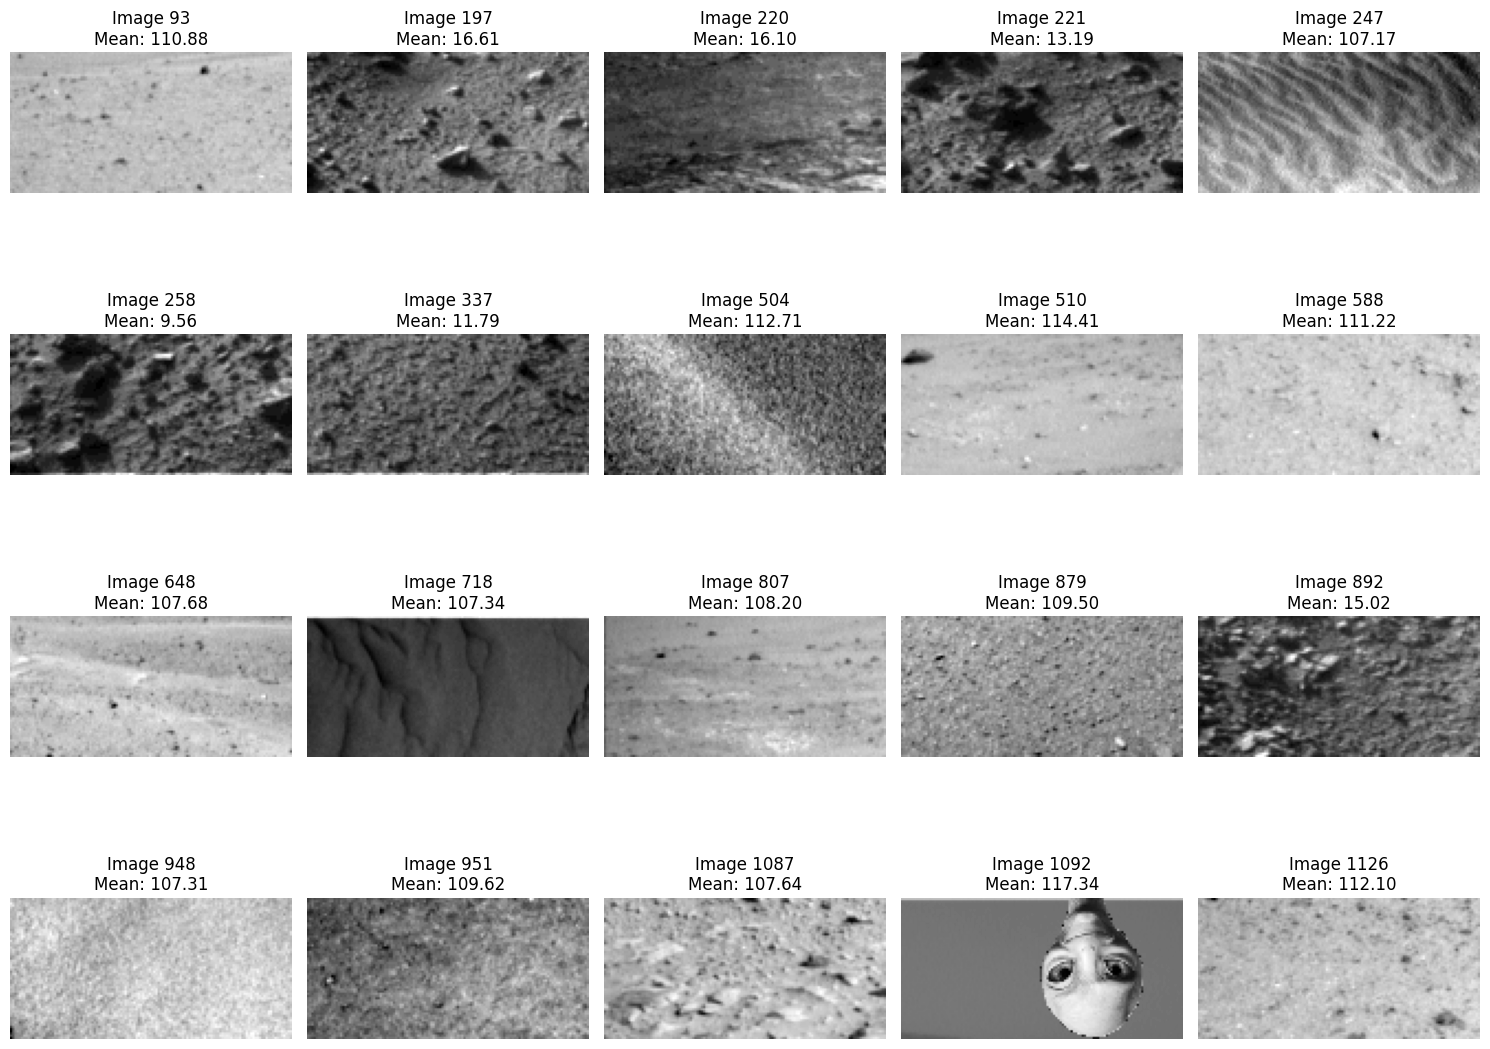

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Calcola la media dei pixel per ogni immagine
pixel_means = [np.mean(img) for img in X_train]

# Calcola la media generale e il range di accettabilità
global_mean = np.mean(pixel_means)
tolerance = 45  # Imposta una tolleranza (puoi modificarla)
lower_bound = global_mean - tolerance
upper_bound = global_mean + tolerance

print(f"Media generale: {global_mean:.2f}")
print(f"Intervallo accettabile: {lower_bound:.2f} - {upper_bound:.2f}")

# Trova gli indici delle immagini fuori dal range
out_of_range_indices = [i for i, mean in enumerate(pixel_means) if mean < lower_bound or mean > upper_bound]

print(f"Numero di immagini fuori range: {len(out_of_range_indices)}")

# Visualizza 20 immagini fuori range, 5 per riga
if len(out_of_range_indices) > 0:
    n_images = min(20, len(out_of_range_indices))  # Mostra massimo 20 immagini
    n_cols = 5  # 5 immagini per riga
    n_rows = (n_images + n_cols - 1) // n_cols  # Calcola il numero di righe necessario

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))  # Dimensione dinamica in base alle righe
    axs = axs.flatten()  # Per semplificare l'accesso agli assi

    for i, idx in enumerate(out_of_range_indices[:n_images]):
        axs[i].imshow(X_train[idx], cmap='gray')
        axs[i].set_title(f"Image {idx}\nMean: {pixel_means[idx]:.2f}")
        axs[i].axis('off')

    # Disabilita gli assi vuoti se le immagini sono meno di 20
    for j in range(n_images, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Nessuna immagine fuori range trovata.")

In [18]:
def calculate_class_proportions(label, num_classes):
    """
    Calculate the proportion of each class in a semantic segmentation label image.
    Args:
        label (numpy array): Label image (height, width).
        num_classes (int): Total number of classes.
    Returns:
        dict: Dictionary with class indices as keys and proportions as values.
    """
    total_pixels = label.size  # Total number of pixels in the image
    proportions = {}
    
    for class_id in range(num_classes):
        class_pixels = np.sum(label == class_id)  # Count pixels of the current class
        proportions[class_id] = class_pixels / total_pixels  # Proportion of this class
    
    return proportions

# Calculate aliens-images class proportions
num_classes = 5  # Background, Soil, Bedrock, Sand, Big Rock
example_label = y_train[1092] 

aliens_proportions = calculate_class_proportions(example_label, num_classes)
print("Class Proportions:", aliens_proportions)

X_train_filtered = []
y_train_filtered = []
X_outliers = []
y_outliers = []
# Filtra i campioni
filtered_indices = []
for i, label in enumerate(y_train):
    proportions = calculate_class_proportions(label, num_classes=5)
    if proportions == aliens_proportions:  # Campioni da rimuovere
        X_outliers.append(X_train[i])
        y_outliers.append(y_train[i])
    else:  # Campioni validi
        X_train_filtered.append(X_train[i])
        y_train_filtered.append(y_train[i])



print(f"Numero di campioni originali: {len(X_train)}")
print(f"Numero di campioni filtrati: {len(X_train_filtered)}")

Class Proportions: {0: 0.530517578125, 1: 0.192626953125, 2: 0.0966796875, 3: 0.18017578125, 4: 0.0}
Numero di campioni originali: 2615
Numero di campioni filtrati: 2505


Visualizzo i primi 25 outlier trovati:


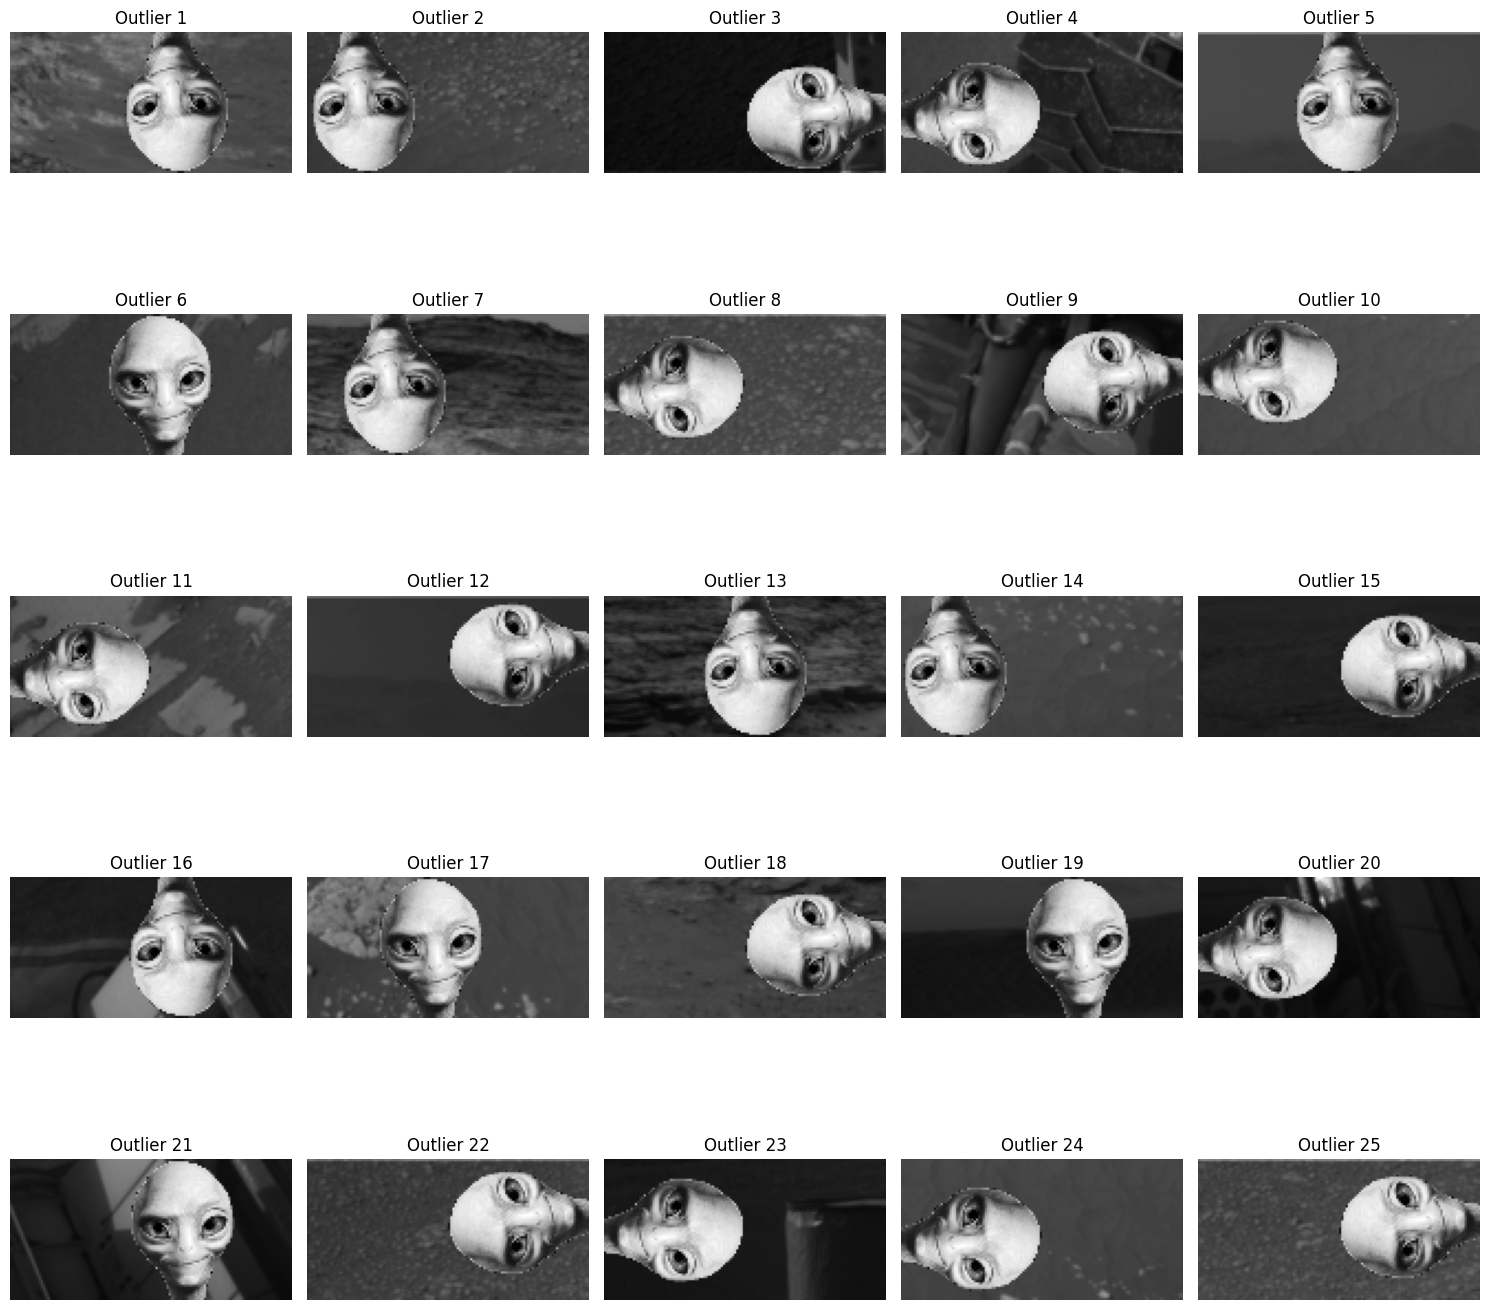

In [19]:
import matplotlib.pyplot as plt

# Numero massimo di outlier da visualizzare
max_outliers_to_display = 25
n_cols = 5  # Numero di colonne
n_rows = (max_outliers_to_display + n_cols - 1) // n_cols  # Calcola il numero di righe necessarie

# Visualizza le immagini degli outlier
if len(X_outliers) > 0:
    print(f"Visualizzo i primi {min(max_outliers_to_display, len(X_outliers))} outlier trovati:")
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))  # Imposta dimensione dinamica
    axs = axs.flatten()  # Rendi più semplice l'accesso agli assi

    for i, img in enumerate(X_outliers[:max_outliers_to_display]):
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f"Outlier {i+1}")
        axs[i].axis('off')  # Rimuovi assi

    # Nascondi gli assi non utilizzati (se meno di 25 immagini)
    for j in range(len(X_outliers[:max_outliers_to_display]), len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Nessun outlier trovato.")
